In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)

# Data preparation

In [2]:
df=pd.read_csv('ZomatoRestaurantsIndia.csv')

In [3]:
df.head(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1


In [4]:
df.shape                       # shape of dataframe.

(211944, 26)

In [5]:
df.info()                        # information of all columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         207117 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [6]:
df.describe()   # statistical information of all numeric columns

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499805,77.615276,1.0,595.812229,1.882535,3.395937,378.002571,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781315,7.500104,0.0,606.239363,0.892989,1.283642,925.333106,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


#  Data cleaning

## Remove null values

In [7]:
df.shape

(211944, 26)

In [8]:
df.isnull().sum()

res_id                       0
name                         0
establishment             4827
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                2069
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [9]:
# since zipcode have more null values (>70%),It is advisable to drop that column









In [10]:
#now drop all the rows having null values.
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
zipcode                 0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [12]:
df.shape

(47472, 26)

## Drop unneccesary columns.

In [13]:
df.shape

(47472, 26)

In [14]:
df.drop(['city_id','country_id','currency','timings','locality_verbose','url'],axis=1,inplace=True) # dropping all unneccesary columns.

In [15]:
df.shape

(47472, 20)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47472 entries, 1 to 211943
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                47472 non-null  int64  
 1   name                  47472 non-null  object 
 2   establishment         47472 non-null  object 
 3   address               47472 non-null  object 
 4   city                  47472 non-null  object 
 5   locality              47472 non-null  object 
 6   latitude              47472 non-null  float64
 7   longitude             47472 non-null  float64
 8   zipcode               47472 non-null  object 
 9   cuisines              47472 non-null  object 
 10  average_cost_for_two  47472 non-null  int64  
 11  price_range           47472 non-null  int64  
 12  highlights            47472 non-null  object 
 13  aggregate_rating      47472 non-null  float64
 14  rating_text           47472 non-null  object 
 15  votes             

## Checking data types for all columns

In [17]:
df.dtypes

res_id                    int64
name                     object
establishment            object
address                  object
city                     object
locality                 object
latitude                float64
longitude               float64
zipcode                  object
cuisines                 object
average_cost_for_two      int64
price_range               int64
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [18]:
# we can say open table support should be should be int and remaining columns are having correct data types.

df['opentable_support']=df.opentable_support.astype('int32')

In [19]:
df.dtypes

res_id                    int64
name                     object
establishment            object
address                  object
city                     object
locality                 object
latitude                float64
longitude               float64
zipcode                  object
cuisines                 object
average_cost_for_two      int64
price_range               int64
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support         int32
delivery                  int64
takeaway                  int64
dtype: object

## Sanity checks for all columns

### Some latitude and longitude values does not belong to India. Change them to null values and drop those rows. 

In [20]:
df.latitude.shape

(47472,)

In [21]:
len(df[df['latitude']<8.40000])+len(df[df['latitude']>37.6000])   

36

In [22]:
df=df[~ ((df['latitude']<8.40000)|(df['latitude']>37.60000))]     # Dropping rows whose latitude does not belongs to India.

In [23]:
df.latitude.shape

(47436,)

In [24]:
df.longitude.shape

(47436,)

In [25]:
len(df[df['longitude']<68.7000])+len(df[df['longitude']>97.25000])   

14

In [26]:
df=df[~ ((df['longitude']<68.7000)|(df['latitude']>97.25000))]        # Dropping rows whose longitude does not belongs to India

In [27]:
df.longitude.shape

(47422,)

In [28]:
df.takeaway.value_counts()             # All right

-1    47422
Name: takeaway, dtype: int64

In [29]:
df.delivery.value_counts()          # it should have only two values either 0 or 1.so changing all -1 to 0.

-1    27369
 1    19913
 0      140
Name: delivery, dtype: int64

In [30]:
df['delivery']=df.delivery.apply(lambda x:0 if x==-1 else x)

In [31]:
df.delivery.value_counts()                  # All right

0    27509
1    19913
Name: delivery, dtype: int64

In [32]:
df.rating_text.value_counts()                 # All right

Very Good        21565
Good             14275
Excellent         6285
Average           4103
Not rated          617
Poor               383
Çok iyi             33
Muito Bom           17
Excelente           16
Harika              15
Muy Bueno           15
Sangat Baik         13
Velmi dobré          9
Bardzo dobrze        9
Baik                 8
Veľmi dobré          8
Skvělé               7
Ottimo               7
İyi                  5
Bom                  5
Skvělá volba         4
Wybitnie             4
Eccellente           4
Dobrze               3
Bueno                2
Muito bom            2
Dobré                2
Terbaik              2
Buono                1
Media                1
Média                1
Průměr               1
Name: rating_text, dtype: int64

In [33]:
df.opentable_support.value_counts()              

0    47422
Name: opentable_support, dtype: int64

In [34]:
df.opentable_support.value_counts()              # we also handled null values in this column.

0    47422
Name: opentable_support, dtype: int64

In [35]:
df.aggregate_rating.value_counts().sort_values()         #  convert them into float

1.8       4
1.9       6
2.0      19
2.1      19
2.2      26
2.3     113
2.6     141
2.7     160
2.5     195
2.4     196
2.9     203
3.0     221
2.8     248
3.1     291
4.9     585
0.0     617
4.8     638
3.2     708
4.7     909
3.4     948
3.3     991
3.5    1327
4.6    1545
3.6    1855
3.7    2605
4.5    2656
4.4    2684
3.8    4050
4.3    4054
3.9    4468
4.2    4651
4.1    5099
4.0    5190
Name: aggregate_rating, dtype: int64

In [36]:
df['aggregate_rating']=df.aggregate_rating.astype('float')          # All right.

In [37]:
df.highlights=df.highlights.apply(lambda x: str(str(x).replace(' ','')))

In [38]:
df.highlights.value_counts()

Dinner,Cash,TakeawayAvailable,DebitCard,Lunch,Delivery,CreditCard,IndoorSeating,AirConditioned                                                                      396
Dinner,Delivery,Lunch,Cash,TakeawayAvailable,IndoorSeating                                                                                                          383
Dinner,TakeawayAvailable,Lunch,Cash,IndoorSeating                                                                                                                   297
Lunch,Cash,TakeawayAvailable,NoAlcoholAvailable,Dinner,Delivery,IndoorSeating                                                                                       220
Dinner,Delivery,CreditCard,DebitCard,Lunch,Cash,TakeawayAvailable,Breakfast,IndoorSeating,AirConditioned,DigitalPaymentsAccepted                                    198
                                                                                                                                                                

In [39]:
df.price_range.value_counts()            # This column is similar to binning.It divides the hotels into four ranges based on average prices.
                                        # All right.

2    16906
1    13098
3    12311
4     5107
Name: price_range, dtype: int64

In [40]:
df.average_cost_for_two.value_counts().sort_values()       # we can see values as 0 , 1, 2 which are not possible values  for this columns.

2250       1
1230       1
7000       1
294        1
1260       1
        ... 
200     2972
600     3440
300     3675
400     3978
500     4946
Name: average_cost_for_two, Length: 92, dtype: int64

In [41]:
# Average cost for two persons cannot be less than 100. So drop all the rows not satisfying the condition.
df=df[(df['average_cost_for_two']>=100)]

In [42]:
df.shape              # 2987 records are dropped.

(47360, 20)

In [43]:
pd.unique(df.average_cost_for_two).min()  # we can see that minimun value is 100 now.

100

In [44]:
df.cuisines=df.cuisines.apply(lambda x:str(x).replace(' ',''))           

In [45]:
len(df.cuisines.value_counts())

3593

In [46]:
df.name.value_counts()

Dominos Pizza                            316
Subway                                   213
KFC                                      186
Drizzle by the beach                     156
Big Bang Theory - Bar & Kitchen          154
                                        ... 
Bar One                                    1
Chai Onn                                   1
Roll Xpress                                1
Mandi King Arabic Restaurant               1
Jaiswals Restaurant and Confectionery      1
Name: name, Length: 8540, dtype: int64

## Duplicate values

In [47]:
df[df['res_id']==122]              # we have 11  same values for res_id 122(duplicates)

,res_id,name,establishment,address,city,locality,latitude,longitude,zipcode,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
53956,122,Lazeez Affaire,Casual Dining,"6/48, Malcha Marg Market, Chanakyapuri, New Delhi",New Delhi,Chanakyapuri,28.602231,77.186106,0,"NorthIndian,Mughlai",2000,4,"Cash,CreditCard,DebitCard,Delivery,TakeawayAva...",4.8,Excellent,1707,1770,0,0,-1
54026,122,Lazeez Affaire,Casual Dining,"6/48, Malcha Marg Market, Chanakyapuri, New Delhi",New Delhi,Chanakyapuri,28.602231,77.186106,0,"NorthIndian,Mughlai",2000,4,"Cash,CreditCard,DebitCard,Delivery,TakeawayAva...",4.8,Excellent,1707,1770,0,0,-1
55988,122,Lazeez Affaire,Casual Dining,"6/48, Malcha Marg Market, Chanakyapuri, New Delhi",New Delhi,Chanakyapuri,28.602231,77.186106,0,"NorthIndian,Mughlai",2000,4,"Cash,CreditCard,DebitCard,Delivery,TakeawayAva...",4.8,Excellent,1707,1770,0,1,-1
56525,122,Lazeez Affaire,Casual Dining,"6/48, Malcha Marg Market, Chanakyapuri, New Delhi",New Delhi,Chanakyapuri,28.602231,77.186106,0,"NorthIndian,Mughlai",2000,4,"Cash,CreditCard,DebitCard,Delivery,TakeawayAva...",4.8,Excellent,1707,1770,0,1,-1
57635,122,Lazeez Affaire,Casual Dining,"6/48, Malcha Marg Market, Chanakyapuri, New Delhi",New Delhi,Chanakyapuri,28.602231,77.186106,0,"NorthIndian,Mughlai",2000,4,"Cash,CreditCard,DebitCard,Delivery,TakeawayAva...",4.8,Excellent,1707,1770,0,1,-1
57903,122,Lazeez Affaire,Casual Dining,"6/48, Malcha Marg Market, Chanakyapuri, New Delhi",New Delhi,Chanakyapuri,28.602231,77.186106,0,"NorthIndian,Mughlai",2000,4,"Cash,CreditCard,DebitCard,Delivery,TakeawayAva...",4.8,Excellent,1707,1770,0,0,-1
58141,122,Lazeez Affaire,Casual Dining,"6/48, Malcha Marg Market, Chanakyapuri, New Delhi",New Delhi,Chanakyapuri,28.602231,77.186106,0,"NorthIndian,Mughlai",2000,4,"Cash,CreditCard,DebitCard,Delivery,TakeawayAva...",4.8,Excellent,1707,1770,0,0,-1
58371,122,Lazeez Affaire,Casual Dining,"6/48, Malcha Marg Market, Chanakyapuri, New Delhi",New Delhi,Chanakyapuri,28.602231,77.186106,0,"NorthIndian,Mughlai",2000,4,"Cash,CreditCard,DebitCard,Delivery,TakeawayAva...",4.8,Excellent,1707,1770,0,0,-1
58643,122,Lazeez Affaire,Casual Dining,"6/48, Malcha Marg Market, Chanakyapuri, New Delhi",New Delhi,Chanakyapuri,28.602231,77.186106,0,"NorthIndian,Mughlai",2000,4,"Cash,CreditCard,DebitCard,Delivery,TakeawayAva...",4.8,Excellent,1707,1770,0,0,-1
58781,122,Lazeez Affaire,Casual Dining,"6/48, Malcha Marg Market, Chanakyapuri, New Delhi",New Delhi,Chanakyapuri,28.602231,77.186106,0,"NorthIndian,Mughlai",2000,4,"Cash,CreditCard,DebitCard,Delivery,TakeawayAva...",4.8,Excellent,1707,1770,0,0,-1


In [48]:
df.shape

(47360, 20)

In [49]:
df.drop_duplicates(keep='first',inplace=True)

In [50]:
df.shape

(12068, 20)

In [51]:
#  Data cleaning process completed.

# Data Understanding and Visualization

## Final Data set after cleaning process

In [52]:
df.head(3)

,res_id,name,establishment,address,city,locality,latitude,longitude,zipcode,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
1,3400005,Mama Chicken Mama Franky House,Quick Bites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,282001,"NorthIndian,Mughlai,Rolls,Chinese,FastFood,Str...",600,2,"Delivery,NoAlcoholAvailable,Dinner,TakeawayAva...",4.4,Very Good,1203,161,0,0,-1
2,3401013,Bhagat Halwai,Quick Bites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,282010,"FastFood,Mithai",300,1,"NoAlcoholAvailable,Dinner,TakeawayAvailable,Br...",4.2,Very Good,801,107,0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,282002,"Desserts,Bakery,FastFood,SouthIndian",300,1,"TakeawayAvailable,CreditCard,Lunch,Delivery,Br...",4.3,Very Good,693,157,0,1,-1


In [53]:
df.shape

(12068, 20)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12068 entries, 1 to 211730
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                12068 non-null  int64  
 1   name                  12068 non-null  object 
 2   establishment         12068 non-null  object 
 3   address               12068 non-null  object 
 4   city                  12068 non-null  object 
 5   locality              12068 non-null  object 
 6   latitude              12068 non-null  float64
 7   longitude             12068 non-null  float64
 8   zipcode               12068 non-null  object 
 9   cuisines              12068 non-null  object 
 10  average_cost_for_two  12068 non-null  int64  
 11  price_range           12068 non-null  int64  
 12  highlights            12068 non-null  object 
 13  aggregate_rating      12068 non-null  float64
 14  rating_text           12068 non-null  object 
 15  votes             

In [55]:
df.describe()

,res_id,latitude,longitude,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,1.206800e+04,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.0,12068.000000,12068.0
mean,8.529625e+06,21.321918,77.468761,818.848608,2.082864,3.774321,587.021959,451.130345,0.0,0.368992,-1.0
std,8.944024e+06,6.126827,4.171374,843.414139,0.984387,0.729446,1147.795053,977.879557,0.0,0.482552,0.0
min,5.000000e+01,8.479662,70.042643,100.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.0
25%,6.588750e+04,17.417054,73.871380,300.000000,1.000000,3.600000,67.000000,23.000000,0.0,0.000000,-1.0
50%,2.901415e+06,21.242703,77.118902,500.000000,2.000000,3.900000,232.000000,109.000000,0.0,0.000000,-1.0
75%,1.865764e+07,26.854860,79.946950,1000.000000,3.000000,4.200000,663.000000,423.250000,0.0,1.000000,-1.0
max,1.915215e+07,32.765580,91.811354,30000.000000,4.000000,4.900000,42539.000000,15545.000000,0.0,1.000000,-1.0


## Now create a new column called region dividing city column into five regions i.e, North,South,Central,Eastern,Western

In [56]:
len(pd.unique(df.city))

95

In [57]:
l=pd.unique(df.city)
sorted(l)

['Agra',
 'Ahmedabad',
 'Ajmer',
 'Allahabad',
 'Amravati',
 'Amritsar',
 'Aurangabad',
 'Bangalore',
 'Bhopal',
 'Bhubaneshwar',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Cuttack',
 'Darjeeling',
 'Dehradun',
 'Dharamshala',
 'Faridabad',
 'Gandhinagar',
 'Gangtok',
 'Ghaziabad',
 'Goa',
 'Gorakhpur',
 'Greater Noida',
 'Guntur',
 'Gurgaon',
 'Guwahati',
 'Gwalior',
 'Haridwar',
 'Howrah',
 'Hyderabad',
 'Indore',
 'Jabalpur',
 'Jaipur',
 'Jalandhar',
 'Jammu',
 'Jamnagar',
 'Jamshedpur',
 'Jhansi',
 'Jodhpur',
 'Junagadh',
 'Kanpur',
 'Kharagpur',
 'Kochi',
 'Kolhapur',
 'Kolkata',
 'Kota',
 'Lucknow',
 'Ludhiana',
 'Madurai',
 'Manali',
 'Mangalore',
 'Manipal',
 'Meerut',
 'Mohali',
 'Mumbai',
 'Mussoorie',
 'Mysore',
 'Nagpur',
 'Nainital',
 'Nashik',
 'Navi Mumbai',
 'Neemrana',
 'New Delhi',
 'Noida',
 'Ooty',
 'Palakkad',
 'Panchkula',
 'Patiala',
 'Patna',
 'Puducherry',
 'Pune',
 'Pushkar',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Rishikesh',
 'Salem',
 'Secunderabad',
 'Shimla',

In [58]:
north=['Zirakpur','Varanasi','Srinagar','Rishikesh','Patiala','Panchakula','Nayagaon','Nainital','Mussoorie','Mohali','Manali','Kanpur','Greater Noida','Shimla','New Delhi','Agra','Chandigarh','Amristar','Jaipur','Lucknow','Ghaziabad','Faridabad','Ludhiana','Meerut','Chandigarh','Gurgaon','Aligarh','Jalandhar','Gorakhpur','Dharamshala','Noida','Dehradun','Jhansi','Jammu','Haridwar']
south=['Goa','Vijayawada','Vizag','Vellore','Udupi','Trichy','Trivandrum','Thrissur','Ooty','Chennai','Hyderabad','Secunderabad','Tirupati','Alappuzha','Bangalore','Coimbatore','Guntur','Kochi','Madurai','Mangalore','Manipal','Mysore','Palakkad','Puducherry','Salem']
central=['Allahabad','Amravathi','Aurangabad','Bhopal','Gwalior','Indore','Jabalpur','Jamshedpur','Junagadh','Kolhapur','Nagpur','Nashik','Raipur']
east=['Kolkata','Bhubaneshwar','Cuttack','Darjeeling','Gangtok','Guwahati','Howrah','Jamnagar','Kharagpur','Patna','Ranchi','Siliguri']
west=['Mumbai','Gandhinagar','Kota','Navi Mumbai','Neemrana','Pune','Pushkar','Rajkot','Surat','Thane','Udaipur','Vadodara','Jodhpur','Ajmer']

In [59]:
len(north)+len(south)+len(east)+len(central)+len(west)  # no of cities mathces

99

In [60]:
def citi(x):
    if x in north:
        return 'North'
    elif x in south:
        return 'South'
    elif x in central:
        return 'Central'
    elif x in east:
        return 'East'
    else:
        return 'West'

In [61]:
df.insert(5,'region',df['city'].apply(citi))  # inserting region column after city_id column.

In [62]:
df.head(2)

,res_id,name,establishment,address,city,region,locality,latitude,longitude,zipcode,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
1,3400005,Mama Chicken Mama Franky House,Quick Bites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,North,Agra Cantt,27.160569,78.011583,282001,"NorthIndian,Mughlai,Rolls,Chinese,FastFood,Str...",600,2,"Delivery,NoAlcoholAvailable,Dinner,TakeawayAva...",4.4,Very Good,1203,161,0,0,-1
2,3401013,Bhagat Halwai,Quick Bites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,North,Shahganj,27.182938,77.979684,282010,"FastFood,Mithai",300,1,"NoAlcoholAvailable,Dinner,TakeawayAvailable,Br...",4.2,Very Good,801,107,0,1,-1


In [63]:
df['region'].dtypes

dtype('O')

In [64]:
# check the column for null values.
df['region'].isnull().sum()                   # All right.

0

## Perform Visualization on each variable

## Uni-Variate Analysis

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12068 entries, 1 to 211730
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                12068 non-null  int64  
 1   name                  12068 non-null  object 
 2   establishment         12068 non-null  object 
 3   address               12068 non-null  object 
 4   city                  12068 non-null  object 
 5   region                12068 non-null  object 
 6   locality              12068 non-null  object 
 7   latitude              12068 non-null  float64
 8   longitude             12068 non-null  float64
 9   zipcode               12068 non-null  object 
 10  cuisines              12068 non-null  object 
 11  average_cost_for_two  12068 non-null  int64  
 12  price_range           12068 non-null  int64  
 13  highlights            12068 non-null  object 
 14  aggregate_rating      12068 non-null  float64
 15  rating_text       

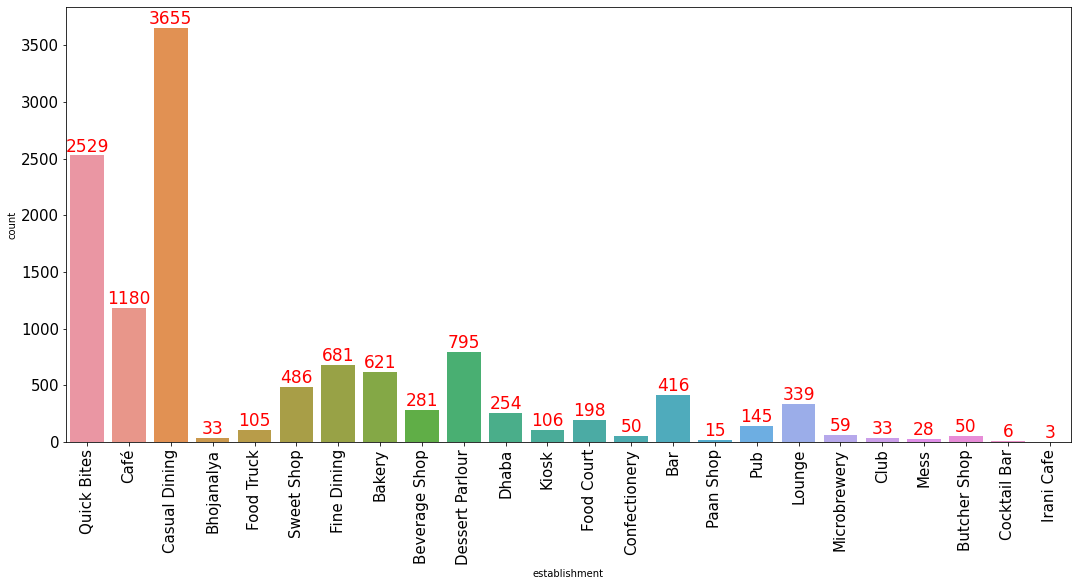

In [85]:
plt.figure(figsize=[18,8])
g=sns.countplot(x='establishment',data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.4,p.get_height()),ha='center',va='bottom',color='red',fontsize=17)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

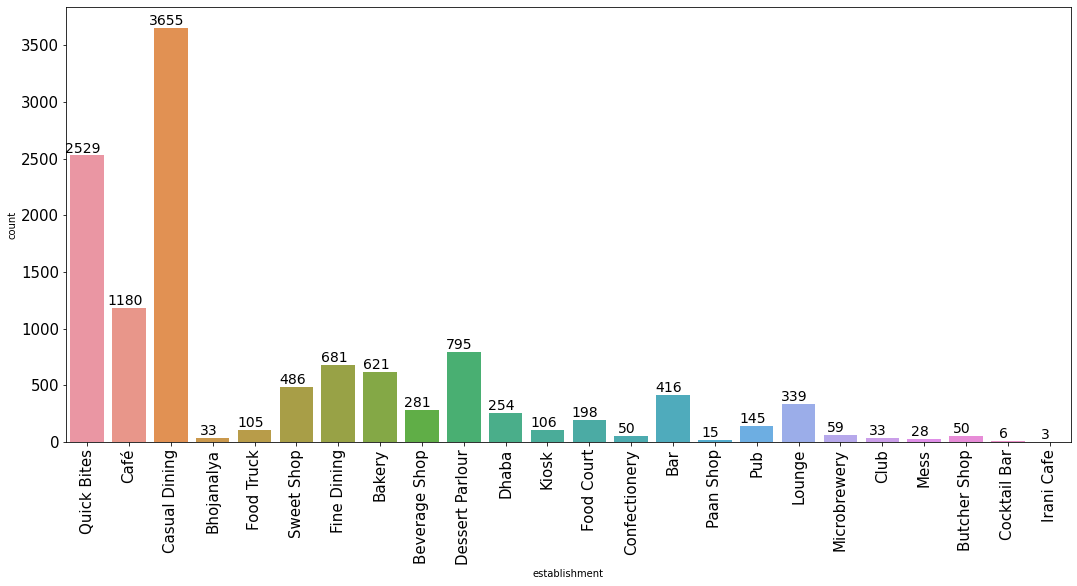

In [66]:
# count plot is used for plotting unique values of column and their counts.
plt.figure(figsize=[18,8])
g=sns.countplot(x='establishment',data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g
plt.xticks(size = 15)
plt.yticks(size = 15)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


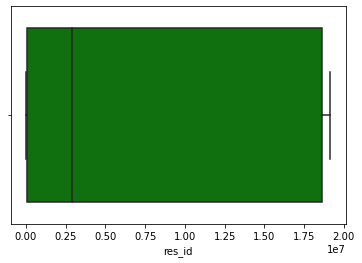

In [67]:
sns.boxplot(x=df.res_id,orient='v',color='green')
plt.show()                               # no outliers beacuse it is a continuos unique variable.

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


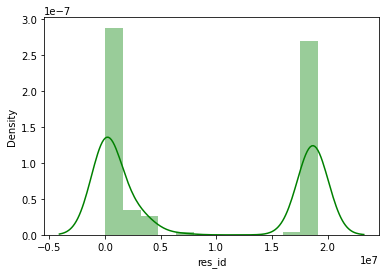

In [68]:
sns.distplot(df.res_id,color='green')
plt.show()

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


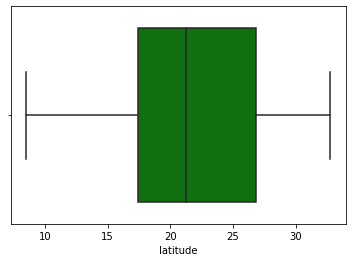

In [69]:
sns.boxplot(x=df.latitude,orient='v',color='green')
plt.show()                     # No outliers

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


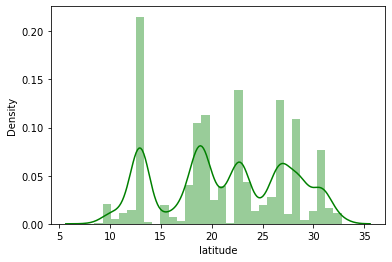

In [70]:
sns.distplot(df.latitude,color='green')
plt.show() 

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


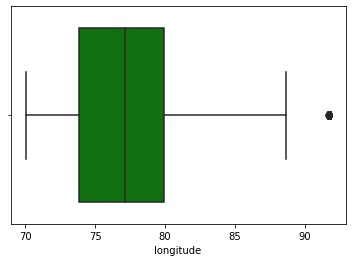

In [71]:
sns.boxplot(x=df.longitude,orient='v',color='green')
plt.show()               # here outliers indicates the restaurents which are far away from the retaurant which is median value.

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


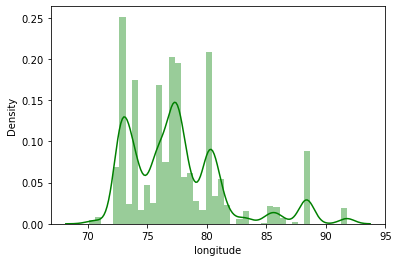

In [72]:
sns.distplot(df.longitude,color='green')
plt.show() 

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


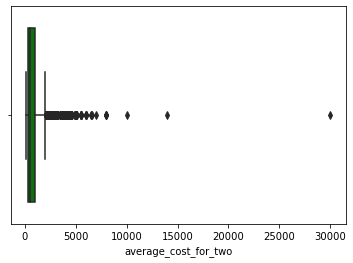

In [73]:
sns.boxplot(x=df.average_cost_for_two,orient='v',color='green')
plt.show()                    # there are more costly restaurants.

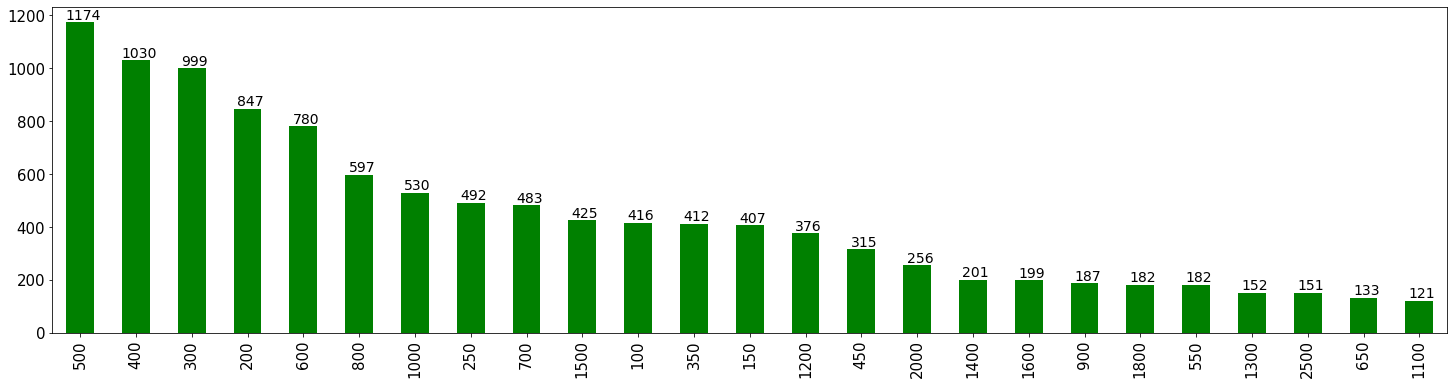

In [74]:
plt.figure(figsize=[25,6])
g=df.average_cost_for_two.value_counts().head(25).plot(kind='bar',color='green')
plt.xticks(size=15)
plt.yticks(size=15)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()
# count of each average_cost_for_two value.

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


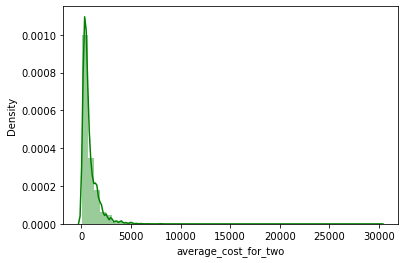

In [75]:
sns.distplot(df.average_cost_for_two,color='green')
plt.show()

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


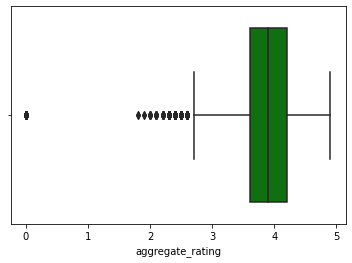

In [76]:
sns.boxplot(x=df.aggregate_rating,orient='v',color='green')
plt.show()          # hotels with 0 rating are the outliers.

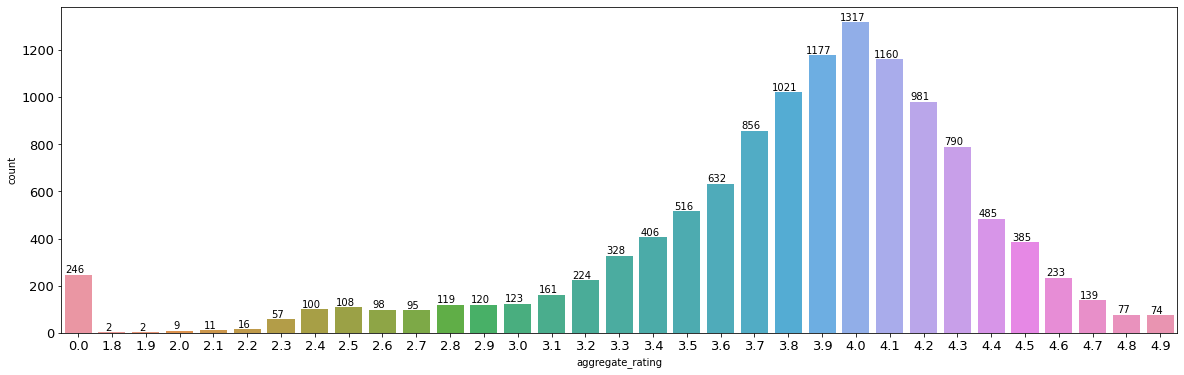

In [77]:
plt.figure(figsize=[20,6])
g=sns.countplot(x=df.aggregate_rating)
plt.xticks(size=13)
plt.yticks(size=13)
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black',fontsize=10)
plt.show()
# count of each aggregate_rating value.

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


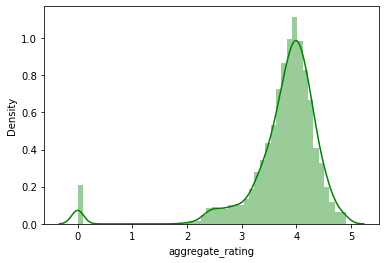

In [78]:
sns.distplot(df.aggregate_rating,color='green')
plt.show()

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


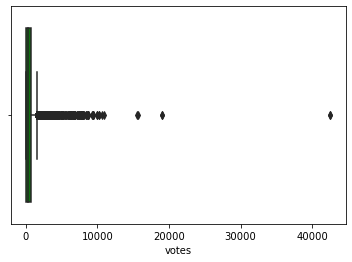

In [79]:
sns.boxplot(x=df.votes,orient='v',color='green')
plt.show()         

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


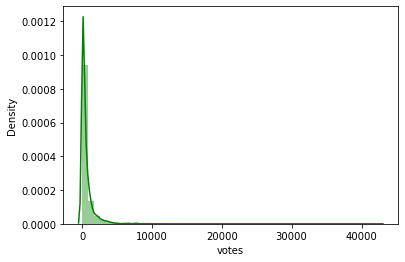

In [80]:
sns.distplot(df.votes,color='green')
plt.show()

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


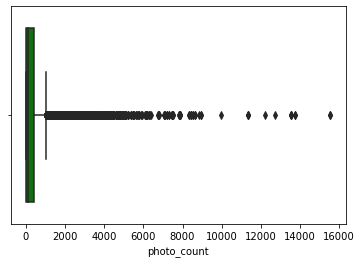

In [81]:
sns.boxplot(x=df.photo_count,orient='v',color='green')
plt.show()   

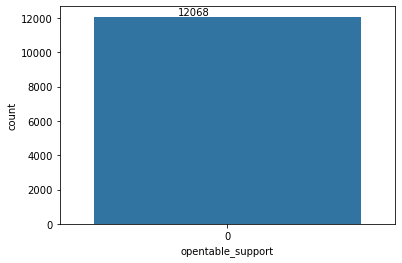

In [82]:
g=sns.countplot(x=df.opentable_support)
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')
plt.show()

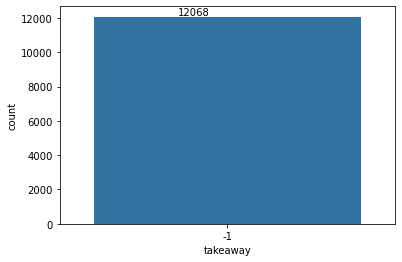

In [83]:
g=sns.countplot(x=df.takeaway)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black')
plt.show()

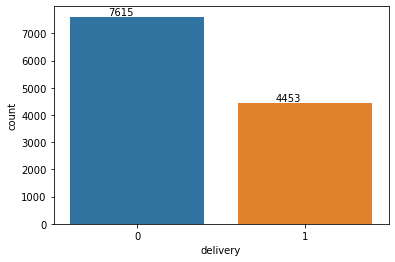

In [84]:
g=sns.countplot(x=df.delivery)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black')
plt.show()

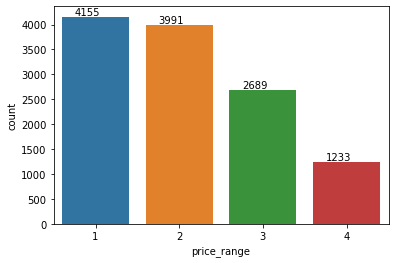

In [85]:
g=sns.countplot(x=df.price_range)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=10)
plt.show()

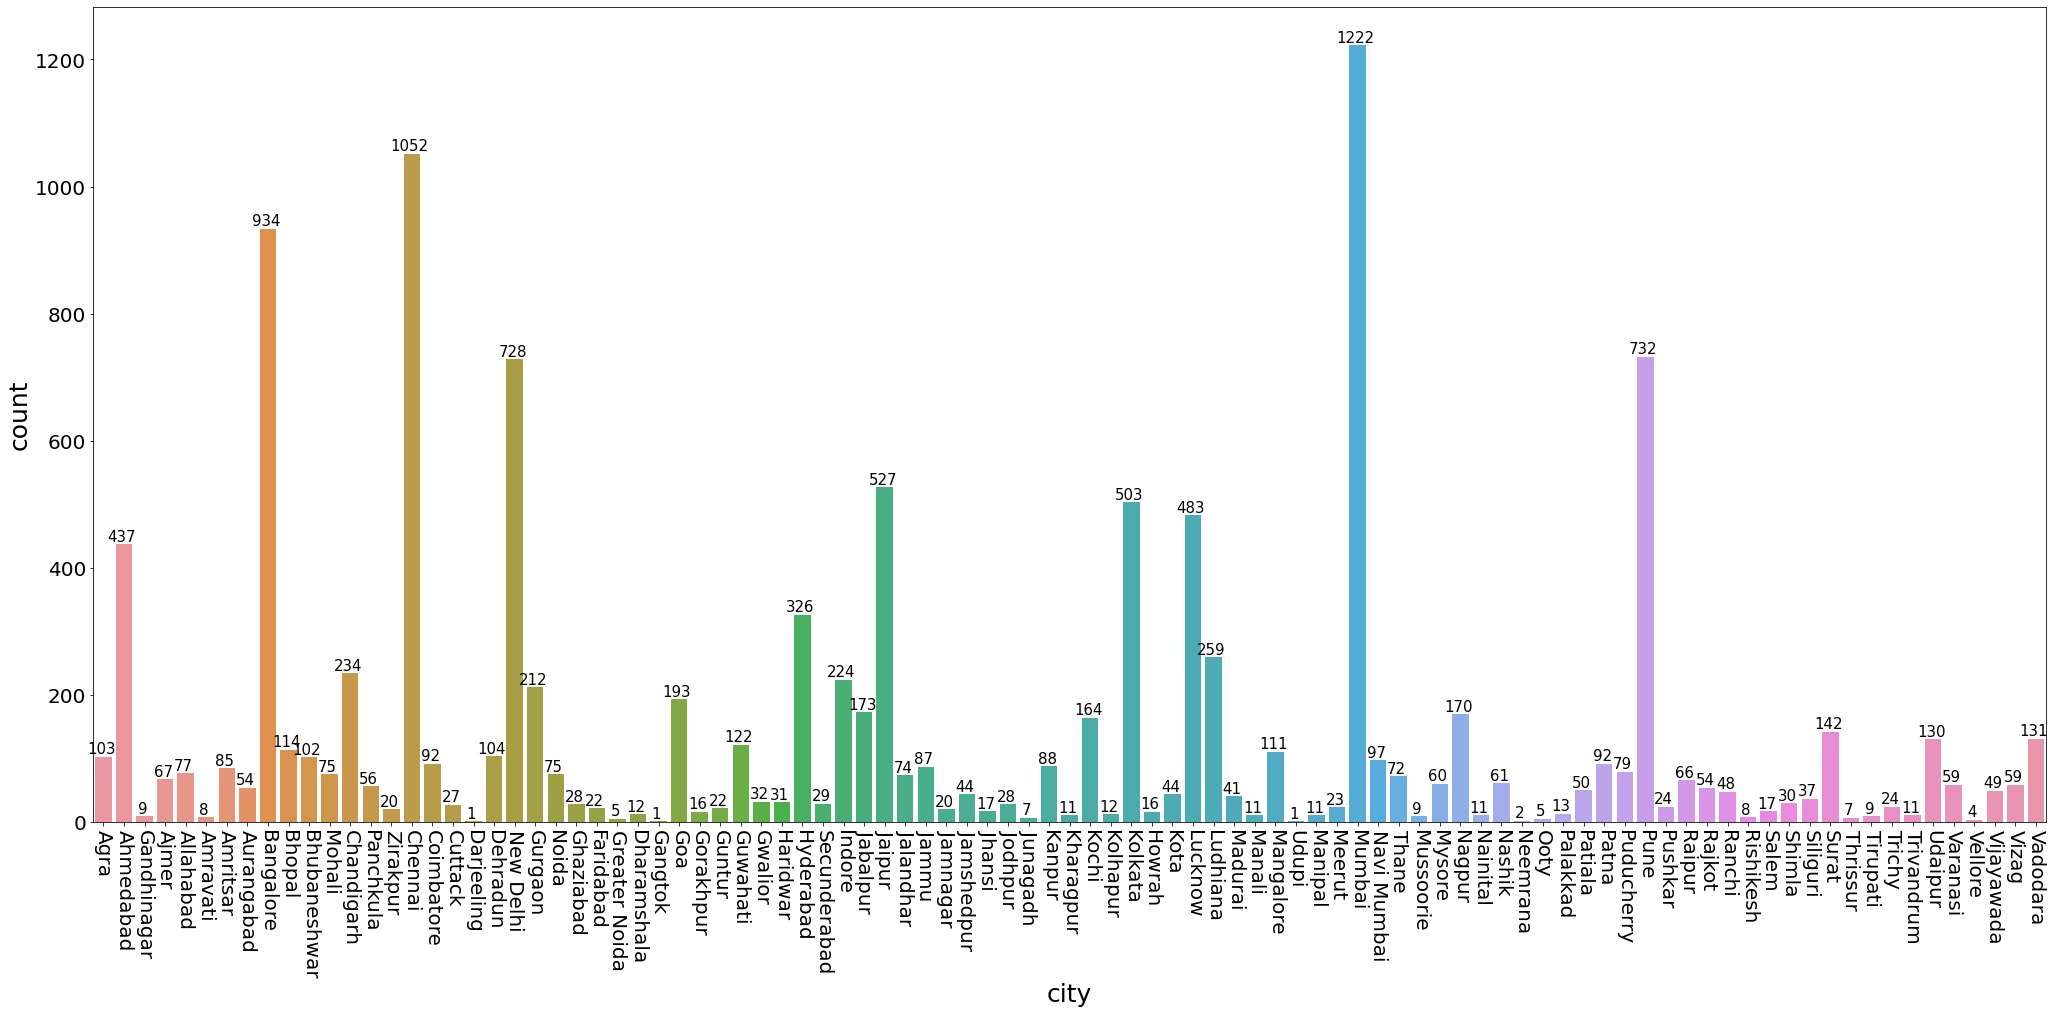

In [86]:
plt.figure(figsize=[35,15])
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('city',size=25)
plt.ylabel('count',size=25)
g=sns.countplot(x=df.city)
g.set_xticklabels(g.get_xticklabels(),rotation=-90)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.show()

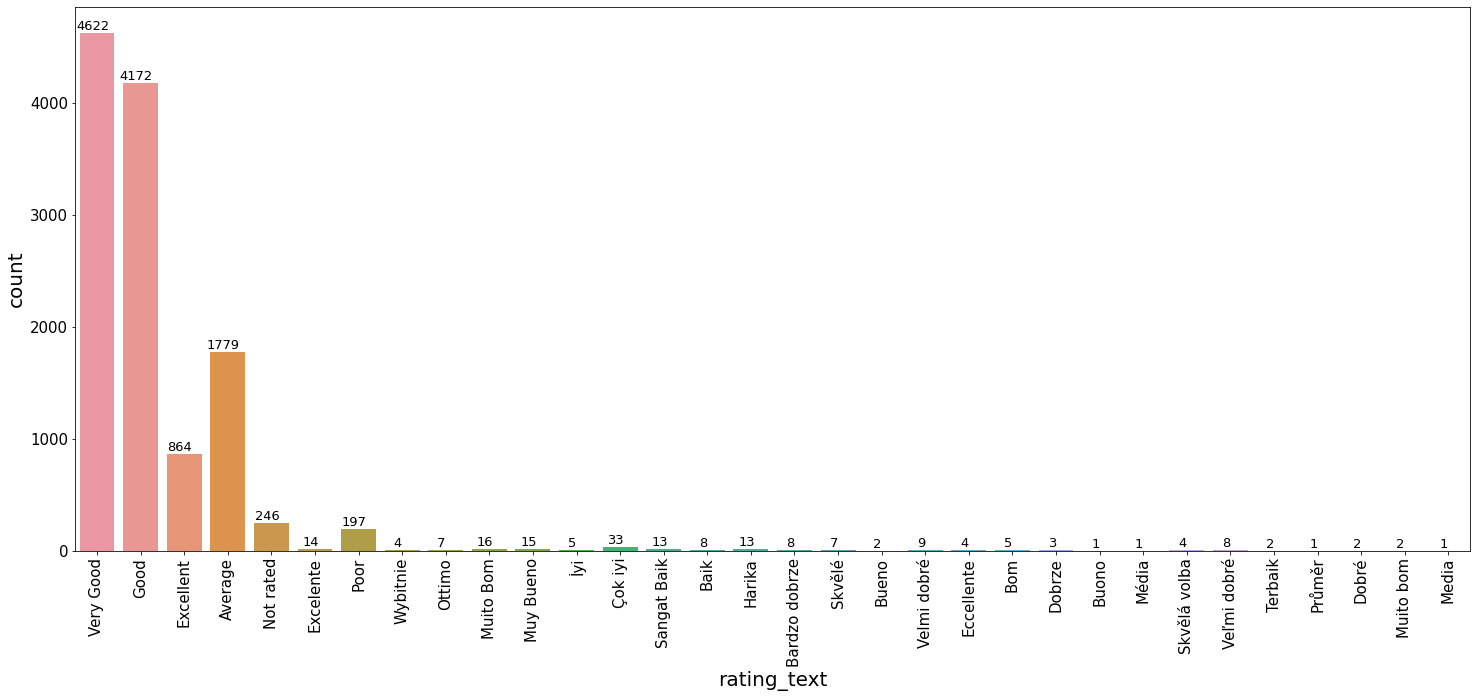

In [87]:
plt.figure(figsize=[25,10])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('rating_text',size=20)
plt.ylabel('count',size=20)
g=sns.countplot(x=df.rating_text)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=13)
plt.show()

## Bi-Variate and Correlation Analysis

In [87]:
df.corr()                               # returns correlation matrix.

,res_id,latitude,longitude,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
res_id,1.000000,0.051023,-0.009041,-0.149748,-0.083758,-0.058992,-0.140472,0.000030,NaN,0.120610,NaN
latitude,0.051023,1.000000,0.027128,-0.049970,-0.048669,-0.071853,-0.081311,-0.044711,NaN,0.017802,NaN
longitude,-0.009041,0.027128,1.000000,-0.071261,-0.055422,-0.009635,-0.043586,-0.051868,NaN,0.066300,NaN
average_cost_for_two,-0.149748,-0.049970,-0.071261,1.000000,0.775873,0.205824,0.166616,0.249361,NaN,-0.145064,NaN
price_range,-0.083758,-0.048669,-0.055422,0.775873,1.000000,0.247378,0.197013,0.288252,NaN,-0.125608,NaN
aggregate_rating,-0.058992,-0.071853,-0.009635,0.205824,0.247378,1.000000,0.289360,0.296999,NaN,0.063578,NaN
votes,-0.140472,-0.081311,-0.043586,0.166616,0.197013,0.289360,1.000000,0.636999,NaN,0.018727,NaN
photo_count,0.000030,-0.044711,-0.051868,0.249361,0.288252,0.296999,0.636999,1.000000,NaN,0.015414,NaN
opentable_support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delivery,0.120610,0.017802,0.066300,-0.145064,-0.125608,0.063578,0.018727,0.015414,NaN,1.000000,NaN


In [88]:
df1=df.drop(['takeaway','opentable_support'],axis=1)         # drop those columns and store it as df1 to get rid of NaN values.

In [89]:
df1.corr()

,res_id,latitude,longitude,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,delivery
res_id,1.000000,0.051023,-0.009041,-0.149748,-0.083758,-0.058992,-0.140472,0.000030,0.120610
latitude,0.051023,1.000000,0.027128,-0.049970,-0.048669,-0.071853,-0.081311,-0.044711,0.017802
longitude,-0.009041,0.027128,1.000000,-0.071261,-0.055422,-0.009635,-0.043586,-0.051868,0.066300
average_cost_for_two,-0.149748,-0.049970,-0.071261,1.000000,0.775873,0.205824,0.166616,0.249361,-0.145064
price_range,-0.083758,-0.048669,-0.055422,0.775873,1.000000,0.247378,0.197013,0.288252,-0.125608
aggregate_rating,-0.058992,-0.071853,-0.009635,0.205824,0.247378,1.000000,0.289360,0.296999,0.063578
votes,-0.140472,-0.081311,-0.043586,0.166616,0.197013,0.289360,1.000000,0.636999,0.018727
photo_count,0.000030,-0.044711,-0.051868,0.249361,0.288252,0.296999,0.636999,1.000000,0.015414
delivery,0.120610,0.017802,0.066300,-0.145064,-0.125608,0.063578,0.018727,0.015414,1.000000


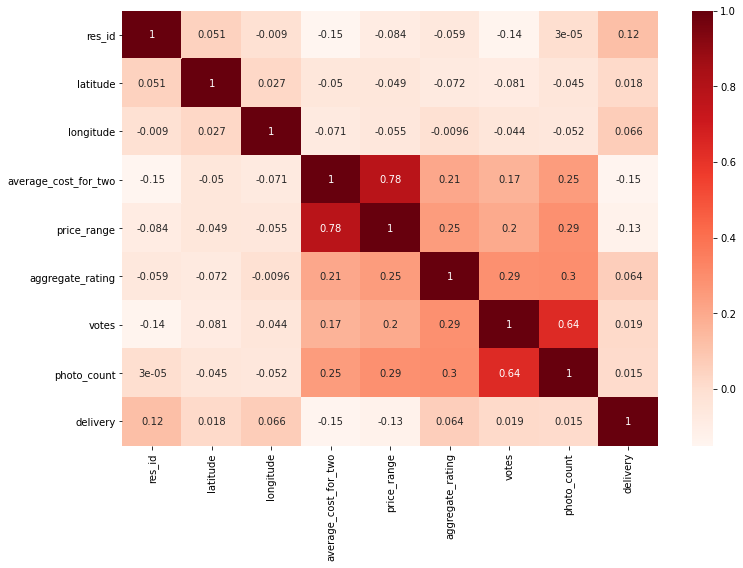

In [94]:
plt.figure(figsize=[12,8])
sns.heatmap(df1.corr(),cmap='Reds',cbar=True,annot=True)          # Heatmap of the correlation matrix.
plt.show()          

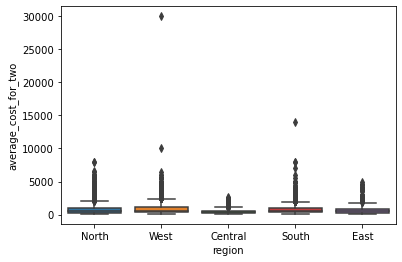

In [92]:
# region v/s average_cost_for_two (since region is a categorical variable no need of grouping/pivoting)
sns.boxplot(x='region',y='average_cost_for_two',data=df)
plt.show()

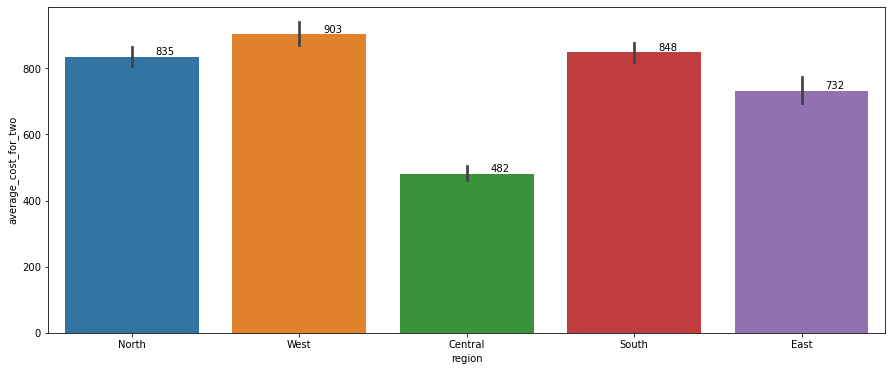

In [93]:
plt.figure(figsize=[15,6])
g=sns.barplot(x='region',y='average_cost_for_two',data=df)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.6,i.get_height()),ha='center',va='bottom',color='black')
plt.show()                 # bar plot uses mean as default.

<AxesSubplot:xlabel='region', ylabel='aggregate_rating'>

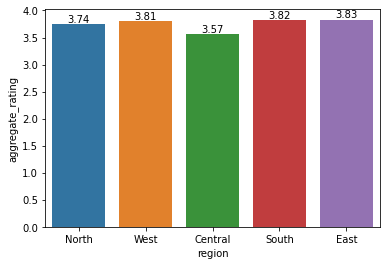

In [94]:
g=sns.barplot(x='region',y='aggregate_rating',data=df,ci=None)
for i in g.patches:
    g.annotate('{:.2f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=10)
g   

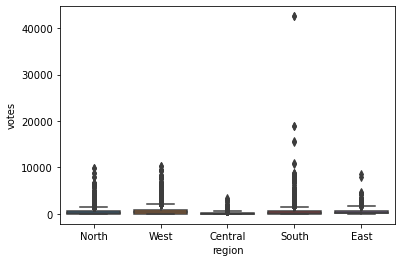

In [95]:
# region vs votes
sns.boxplot(x='region',y='votes',data=df)
plt.show()    

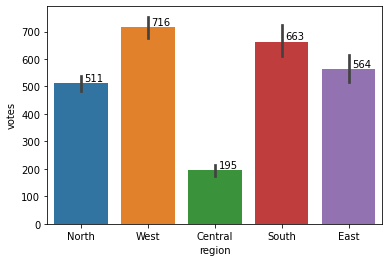

In [96]:
g=sns.barplot(x='region',y='votes',data=df)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.6,i.get_height()),ha='center',va='bottom',color='black')
plt.show()        # avg number of votes per region

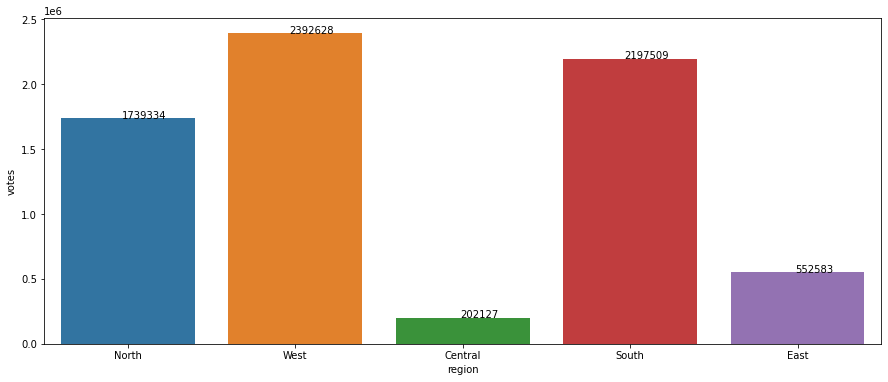

In [97]:
plt.figure(figsize=[15,6])
g=sns.barplot(x='region',y='votes',data=df,estimator=sum,ci=None)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.5,i.get_height()+1),ha='center',color='black')
plt.show()     # sum of votes per region.

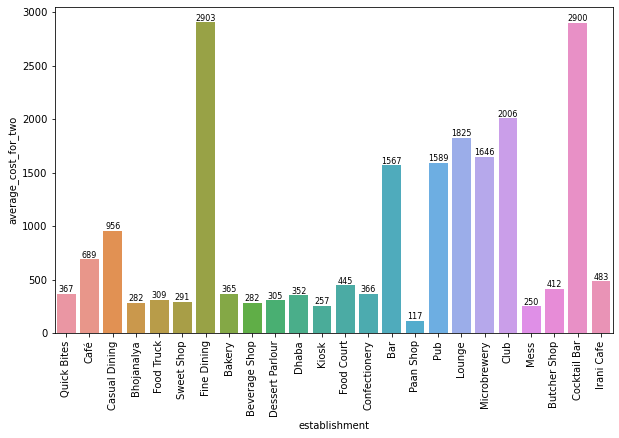

In [98]:
plt.figure(figsize=[10,6])
g=sns.barplot(x='establishment',y='average_cost_for_two',data=df,ci=None)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=8)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()                              # mean value of average_cost_for_two for each establishment.

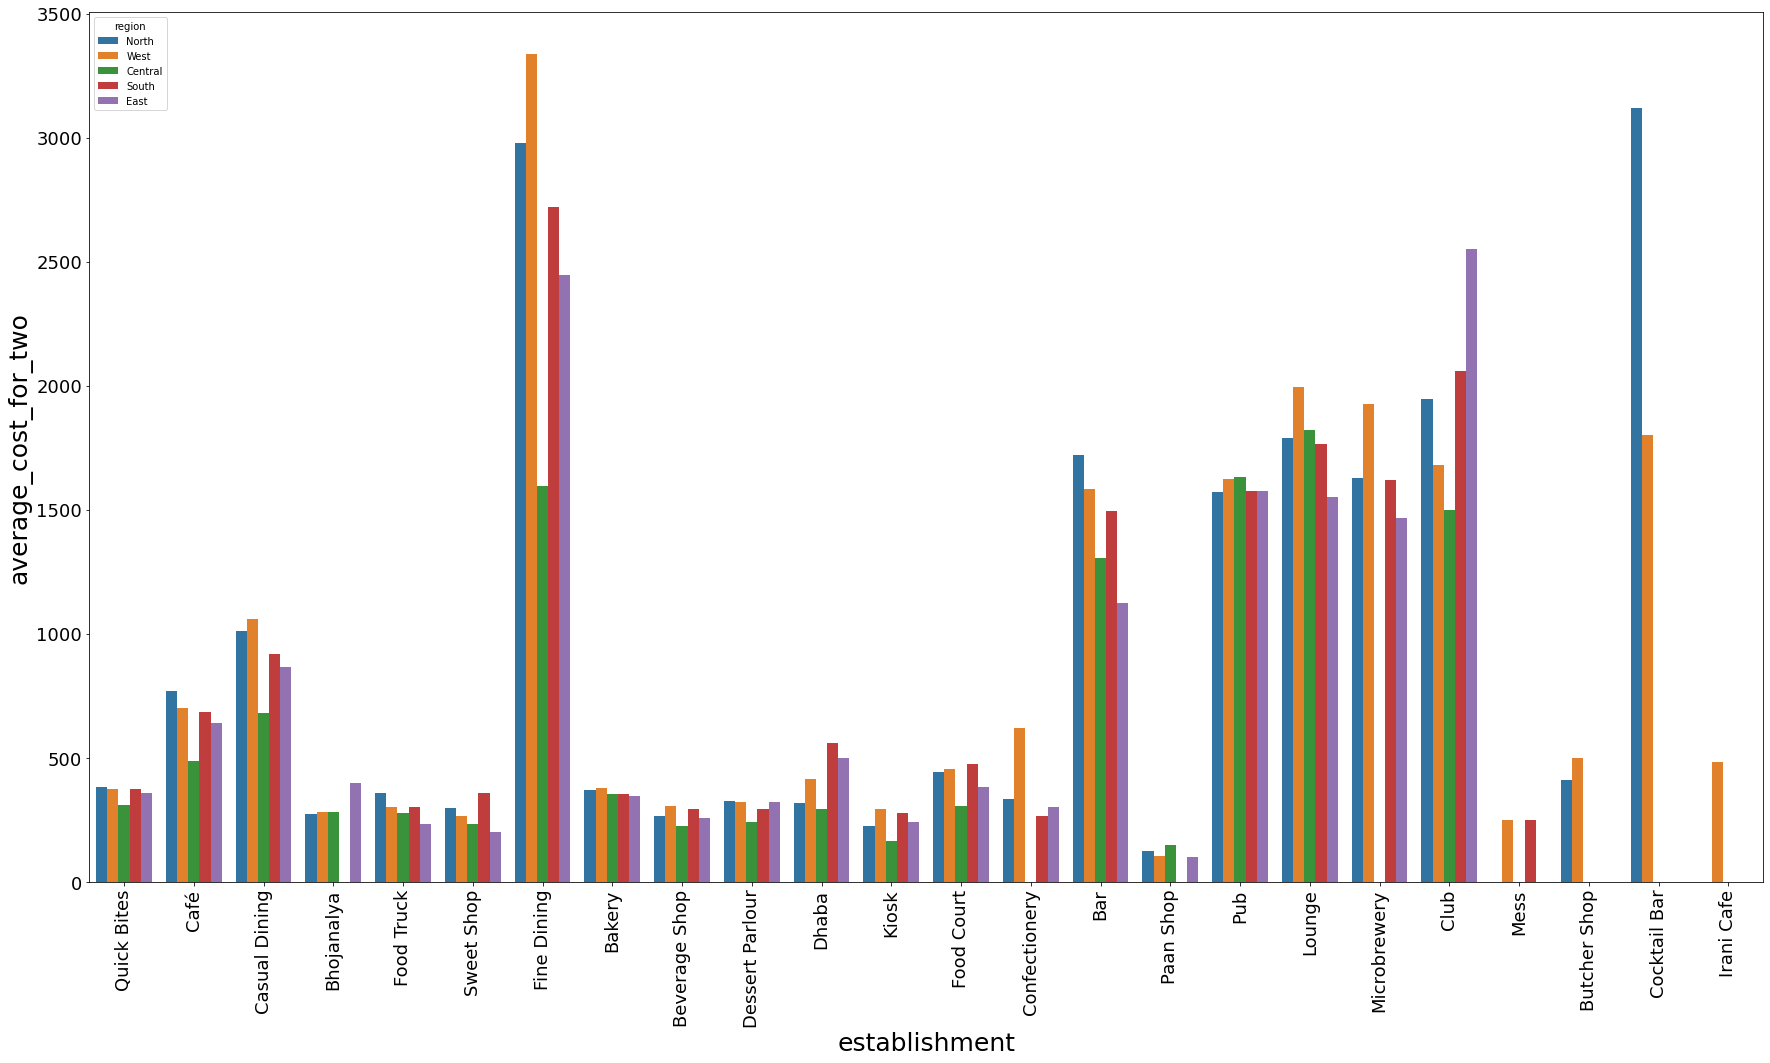

In [99]:
# establishments vs region
plt.figure(figsize=[30,16])
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('establishment',size=25)
plt.ylabel('average_cost_for_two',size=25)
g=sns.barplot(x='establishment',y='average_cost_for_two',hue='region',data=df,ci=None)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

<AxesSubplot:xlabel='aggregate_rating', ylabel='photo_count'>

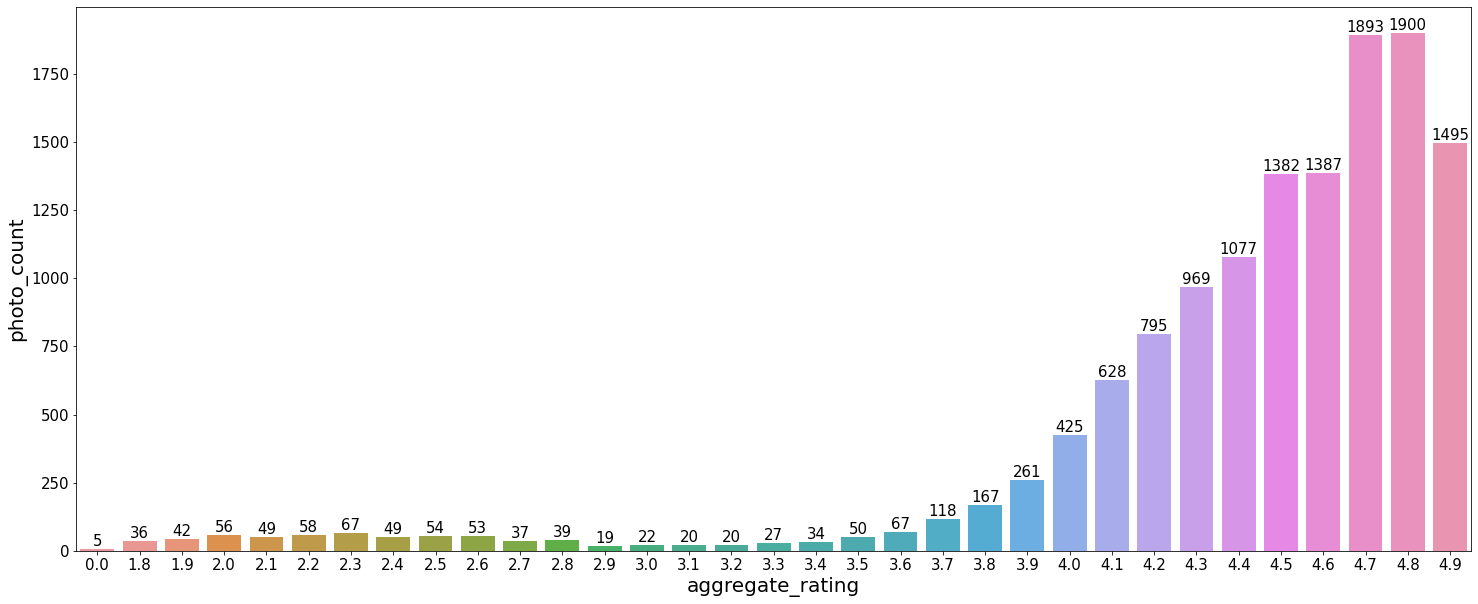

In [100]:
plt.figure(figsize=[25,10])
g=sns.barplot(x='aggregate_rating',y='photo_count',data=df,estimator=np.mean,ci=None)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('aggregate_rating',size=20)
plt.ylabel('photo_count',size=20)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
g          # aggregate_rating v/s photo_count(mean)
# we can see that highest ratings have highest mean of photo_counts.

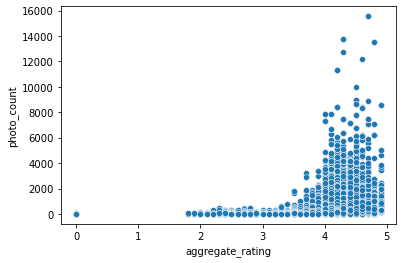

In [101]:
sns.scatterplot(x='aggregate_rating',y='photo_count',data=df)
plt.show()

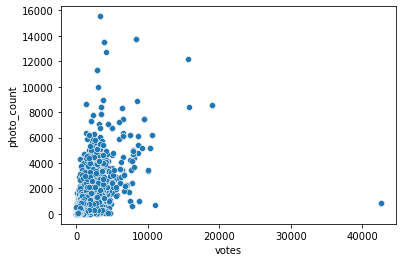

In [102]:
sns.scatterplot(x='votes',y='photo_count',data=df)
plt.show()

In [103]:
df.head(2)

,res_id,name,establishment,address,city,region,locality,latitude,longitude,zipcode,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
1,3400005,Mama Chicken Mama Franky House,Quick Bites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,North,Agra Cantt,27.160569,78.011583,282001,"NorthIndian,Mughlai,Rolls,Chinese,FastFood,Str...",600,2,"Delivery,NoAlcoholAvailable,Dinner,TakeawayAva...",4.4,Very Good,1203,161,0,0,-1
2,3401013,Bhagat Halwai,Quick Bites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,North,Shahganj,27.182938,77.979684,282010,"FastFood,Mithai",300,1,"NoAlcoholAvailable,Dinner,TakeawayAvailable,Br...",4.2,Very Good,801,107,0,1,-1


<AxesSubplot:xlabel='establishment', ylabel='count'>

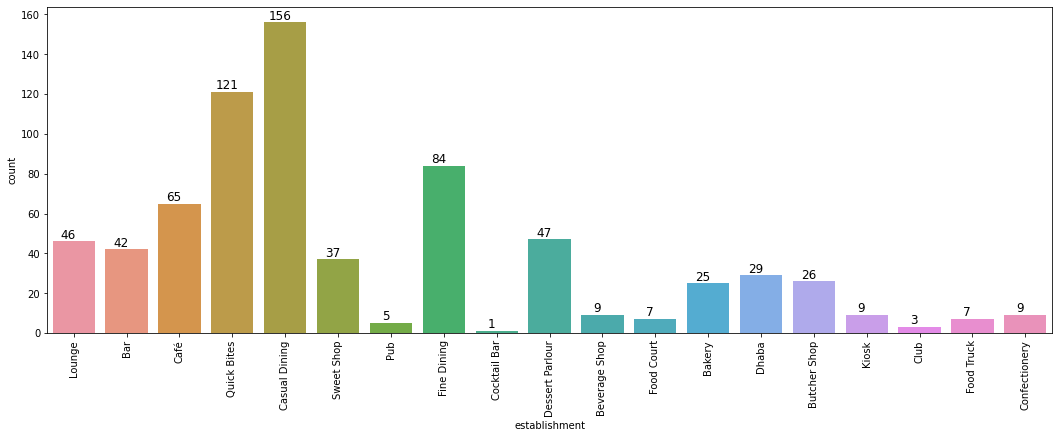

In [104]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city']=='New Delhi']
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

<AxesSubplot:xlabel='establishment', ylabel='count'>

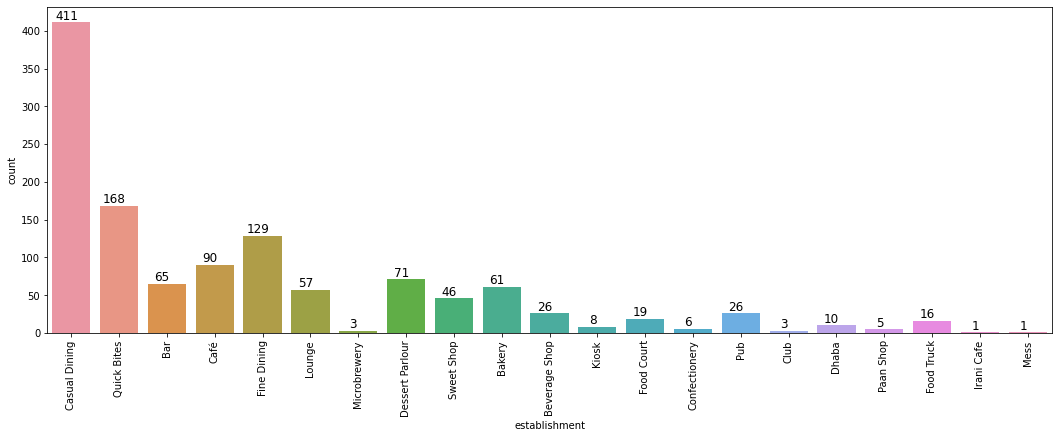

In [105]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city']=='Mumbai']
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

<AxesSubplot:xlabel='establishment', ylabel='count'>

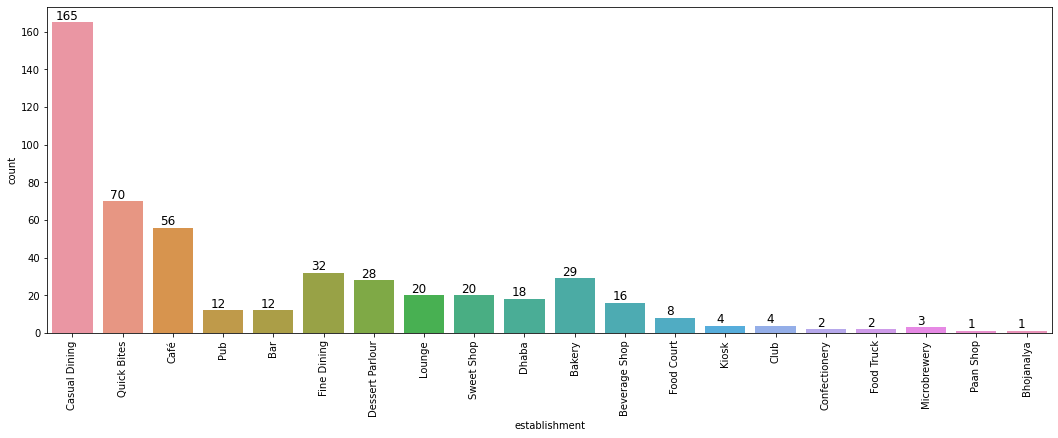

In [106]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city']=='Kolkata']
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

<AxesSubplot:xlabel='establishment', ylabel='count'>

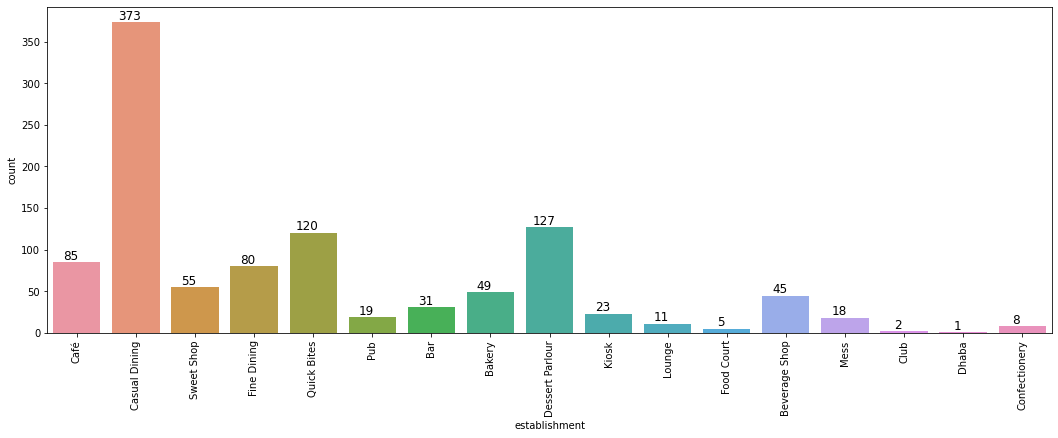

In [107]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city']=='Chennai']
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

<AxesSubplot:xlabel='establishment', ylabel='count'>

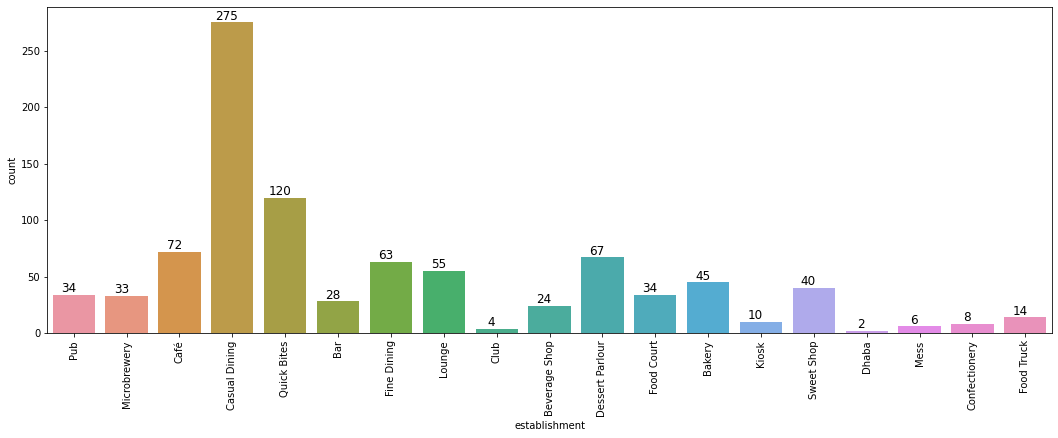

In [108]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city']=='Bangalore']
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

<AxesSubplot:xlabel='establishment', ylabel='count'>

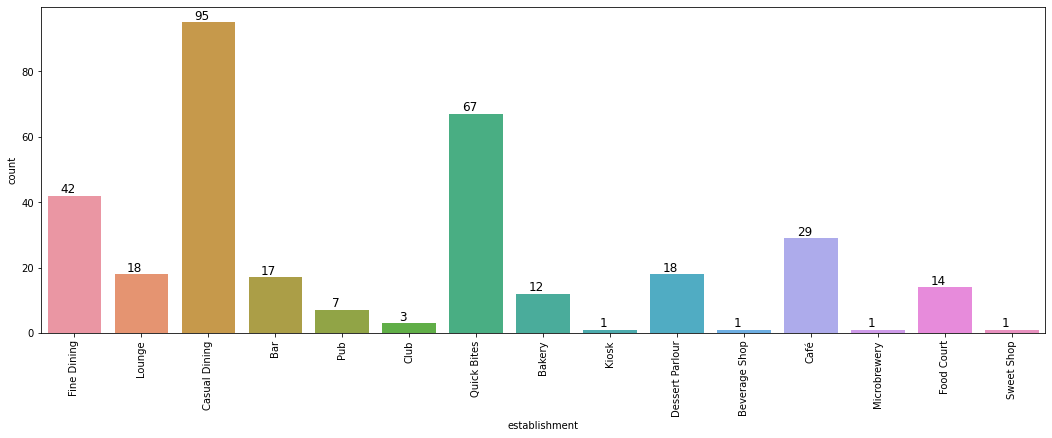

In [109]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city'].isin(['Hyderabad','Secundarabad'])]
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

In [110]:
df.head(3)

,res_id,name,establishment,address,city,region,locality,latitude,longitude,zipcode,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
1,3400005,Mama Chicken Mama Franky House,Quick Bites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,North,Agra Cantt,27.160569,78.011583,282001,"NorthIndian,Mughlai,Rolls,Chinese,FastFood,Str...",600,2,"Delivery,NoAlcoholAvailable,Dinner,TakeawayAva...",4.4,Very Good,1203,161,0,0,-1
2,3401013,Bhagat Halwai,Quick Bites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,North,Shahganj,27.182938,77.979684,282010,"FastFood,Mithai",300,1,"NoAlcoholAvailable,Dinner,TakeawayAvailable,Br...",4.2,Very Good,801,107,0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,North,Civil Lines,27.205668,78.004799,282002,"Desserts,Bakery,FastFood,SouthIndian",300,1,"TakeawayAvailable,CreditCard,Lunch,Delivery,Br...",4.3,Very Good,693,157,0,1,-1


In [111]:
cuisines=[]
for i in df.cuisines:
    l=i.split(',')
    for j in l:
        if j not in cuisines:
            cuisines.append(j)
cuisines

['NorthIndian',
 'Mughlai',
 'Rolls',
 'Chinese',
 'FastFood',
 'StreetFood',
 'Mithai',
 'Desserts',
 'Bakery',
 'SouthIndian',
 'Cafe',
 'Continental',
 'Italian',
 'Wraps',
 'Beverages',
 'Rajasthani',
 'Mexican',
 'Pizza',
 'Indian',
 'FingerFood',
 'European',
 'Gujarati',
 'Burger',
 'Sandwich',
 'BBQ',
 'Lebanese',
 'HealthyFood',
 'Maharashtrian',
 'Japanese',
 'Asian',
 'Salad',
 'Coffee',
 'Sushi',
 'Thai',
 'IceCream',
 'Mediterranean',
 'Greek',
 'Korean',
 'Juices',
 'Hyderabadi',
 'Biryani',
 'Tea',
 'Seafood',
 'Momos',
 'FrozenYogurt',
 'Sindhi',
 'Goan',
 'Afghan',
 'Paan',
 'DrinksOnly',
 'CharcoalChicken',
 'Malwani',
 'Pakistani',
 'American',
 'Kebab',
 'ModernIndian',
 'Steak',
 'Andhra',
 'Vietnamese',
 'Burmese',
 'Arabian',
 'Kashmiri',
 'Mangalorean',
 'Konkan',
 'Kerala',
 'Lucknowi',
 'Tex-Mex',
 'French',
 'Spanish',
 'Tibetan',
 'Bengali',
 'BarFood',
 'German',
 'Chettinad',
 'Awadhi',
 'Indonesian',
 'Malaysian',
 'Turkish',
 'Cantonese',
 'Singaporean',

In [112]:
len(cuisines)

121

In [116]:
cuisine_count=np.zeros(121,dtype=int)
for i in cuisines:
    for j in df.cuisines:
        l=j.split(',')
        if i in l:
            cuisine_count[cuisines.index(i)]+=1

In [117]:
cuisine_count

array([5056,  700,  189, 3490, 2621,  806,  607, 1767,  903, 1278, 1284,
       2067, 1594,   44, 1377,   98,  359,  681,   74,  432,  309,   78,
        461,  361,  146,  101,  257,   98,  131,  559,  377,   48,   58,
        326,  656,  182,   12,   20,  166,   47,  663,   66,  442,  283,
          7,    2,   93,   34,   18,    5,    6,   37,    1,  323,  185,
         70,   46,   93,   22,   19,  123,    6,   42,   18,   94,   31,
         17,   45,   13,   28,   76,   60,    8,   47,   20,   12,   37,
         15,    8,   11,    6,    2,    1,   36,    1,   15,   49,   12,
          3,    6,    1,    9,    5,    2,   29,   13,    1,    3,    5,
          1,    2,    3,    2,    8,   10,    3,    5,   12,    2,    6,
          3,    4,    1,    3,    3,   11,    2,    1,    3,    5,    1])

In [118]:
cuisines=pd.DataFrame({'cuisine':cuisines,'count':cuisine_count})
cuisines.head(10)

,cuisine,count
0,NorthIndian,5056
1,Mughlai,700
2,Rolls,189
3,Chinese,3490
4,FastFood,2621
5,StreetFood,806
6,Mithai,607
7,Desserts,1767
8,Bakery,903
9,SouthIndian,1278


In [120]:
cuisines.sort_values(by='count',ascending=False,inplace=True)

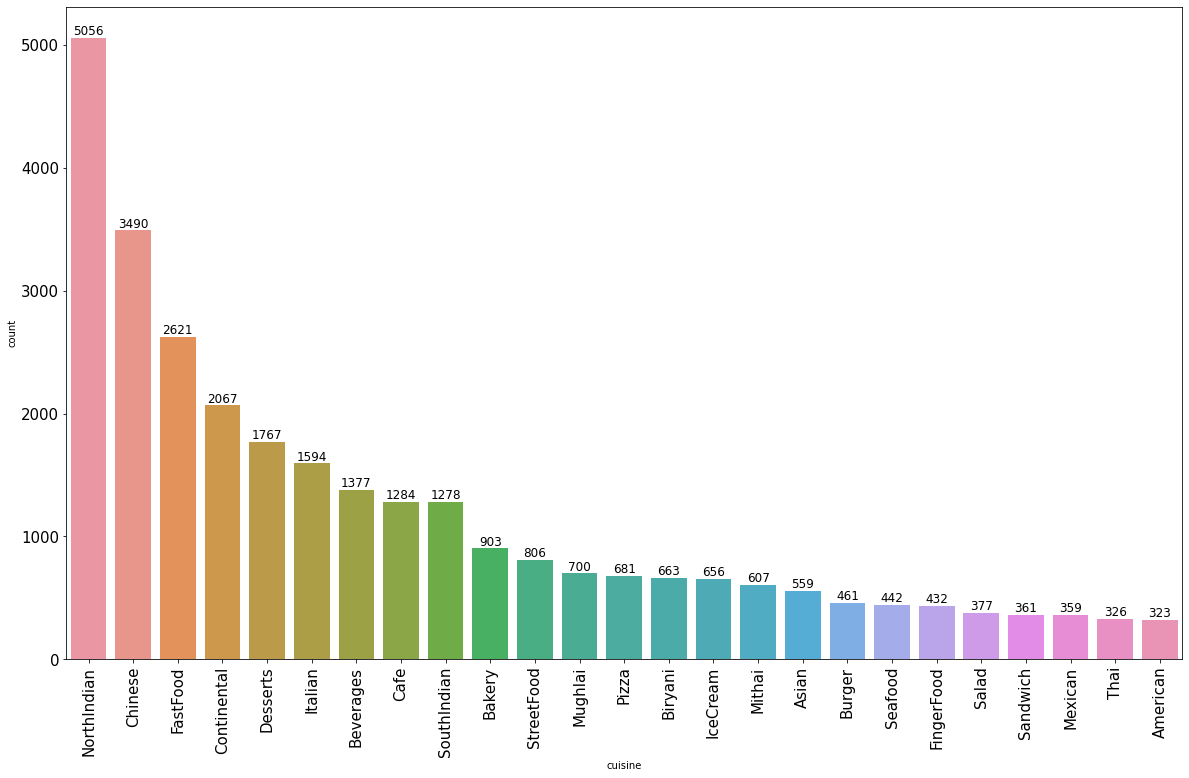

In [121]:
plt.figure(figsize=[20,12])
g=sns.barplot(x='cuisine',y='count',data=cuisines.head(25),ci=None)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.xticks(size=15)
plt.yticks(size=15)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
plt.show()

In [122]:
highlights=[]
for i in df.highlights:
    l=i.split(',')
    for j in l:
        if j not in highlights:
            highlights.append(j)
highlights

['Delivery',
 'NoAlcoholAvailable',
 'Dinner',
 'TakeawayAvailable',
 'Lunch',
 'Cash',
 'IndoorSeating',
 'Breakfast',
 'OutdoorSeating',
 'AirConditioned',
 'SelfService',
 'DigitalPaymentsAccepted',
 'PureVeg',
 'DessertsandBakes',
 'CreditCard',
 'SmokingArea',
 'DanceFloor',
 'Tablebookingrecommended',
 'DebitCard',
 'FreeWifi',
 'ServesAlcohol',
 'Fullbar',
 'Beer',
 'Rooftop',
 'Wine',
 'NoSeatingAvailable',
 'ServesCocktails',
 'Buffet',
 'ServesJainFood',
 'Poolside',
 'LiveMusic',
 'Tablereservationrequired',
 'Wifi',
 'LiveSportsScreening',
 'AxisBank-DiningDelights',
 'FreeParking',
 'ValetParkingAvailable',
 'PrivateDiningAreaAvailable',
 'Nightlife',
 'DJ',
 'Hookah',
 'LiveEntertainment',
 'KidFriendly',
 'LuxuryDining',
 '4/5Star',
 'WheelchairAccessible',
 'Pre-OrderingRequired',
 'HomeBaker',
 'VeganOptions',
 'GamingArea',
 'SportsTV',
 'Halal',
 'GroupMeal',
 'StandingTables',
 'TableReservationNotRequired',
 'CoupleEntryOnly',
 'Tablebookingnotavailable',
 'Sneakpe

In [123]:
len(highlights)

101

In [124]:
highlight_count=np.zeros(len(highlights),dtype=int)
for i in highlights:
    for j in df.highlights:
        l=j.split(',')
        if i in l:
            highlight_count[highlights.index(i)]+=1
highlight_count

array([ 7579,  3606,  9574, 10182,  9178, 11695, 10166,  2740,  2773,
        7849,   168,  3593,  3499,  2776,  8887,  1907,   177,  3444,
        8089,   689,  1568,  2600,   376,   447,   363,   881,   390,
         866,   418,    29,   840,   342,  2131,  1330,   653,  1406,
        1831,   276,  1042,   308,   155,   345,   505,   367,   580,
        1381,   118,    41,   181,    21,   112,   165,   179,    99,
         638,     8,   119,   184,   308,   120,   539,   325,   706,
          18,    98,   123,    11,   102,   110,    15,   267,    71,
         149,    85,    19,    53,   119,    73,    37,   220,    40,
         117,    78,    96,    52,    93,     9,    38,    20,    39,
          12,     3,     6,    41,     1,     3,     7,     1,    26,
           1,     1])

In [125]:
highlights=pd.DataFrame({'highlight':highlights,'count':highlight_count})
highlights.head(2)

,highlight,count
0,Delivery,7579
1,NoAlcoholAvailable,3606


In [126]:
highlights.sort_values(by='count',ascending=False,inplace=True)

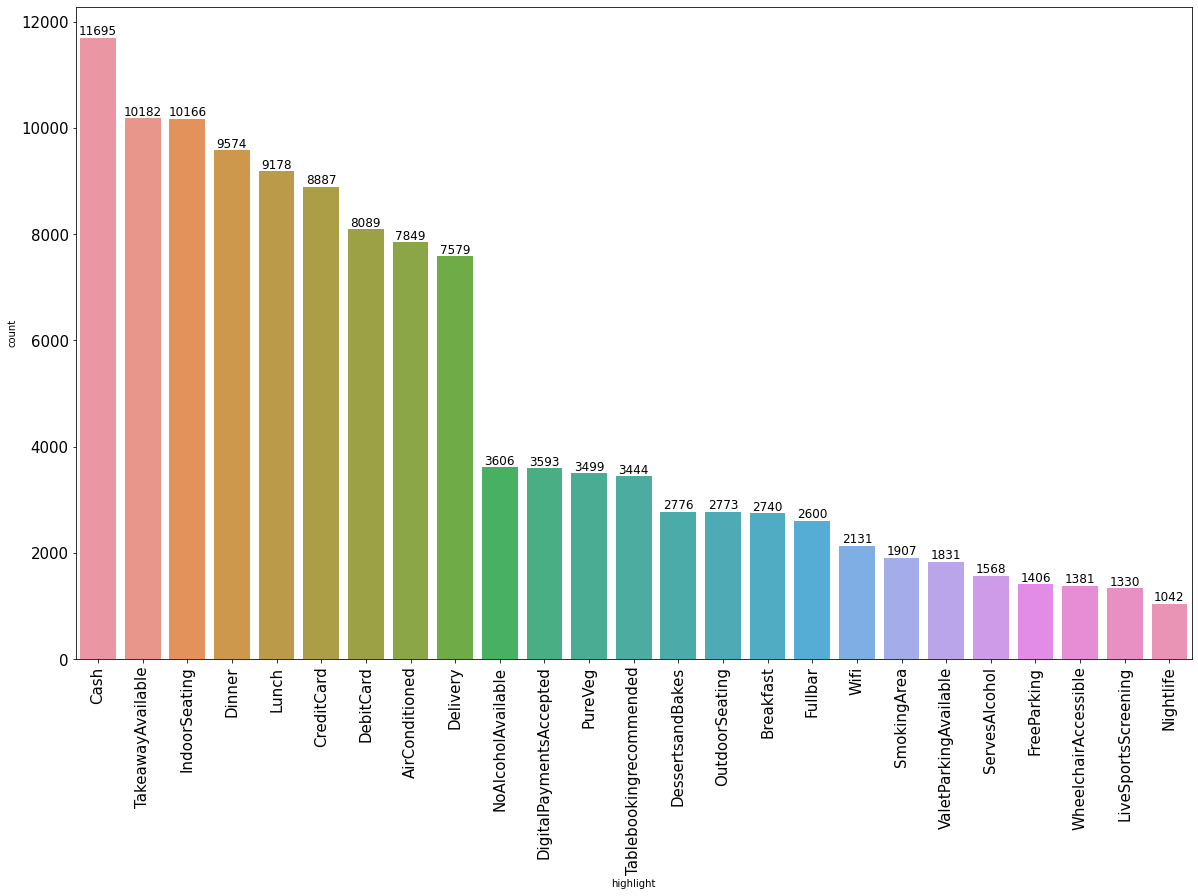

In [127]:
plt.figure(figsize=[20,12])
g=sns.barplot(x='highlight',y='count',data=highlights.head(25),ci=None)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.xticks(size=15)
plt.yticks(size=15)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
plt.show()

###  In the same way,We can seperate data for different cities and perform operations to visualize.

In [128]:
h=df.pivot_table(index='establishment',columns='region',values=['average_cost_for_two'],aggfunc='mean')
h.replace({np.nan:0},inplace=True)
h

average_cost_for_two                                         \
region                       Central         East        North        South   
establishment                                                                 
Bakery                    352.884615   346.808511   370.833333   353.614458   
Bar                      1305.555556  1123.076923  1721.982759  1494.329897   
Beverage Shop             226.086957   259.642857   263.793103   295.555556   
Bhojanalya                283.333333   400.000000   273.076923     0.000000   
Butcher Shop                0.000000     0.000000   410.204082     0.000000   
Café                      489.316239   641.818182   769.696970   683.278146   
Casual Dining             680.756579   866.420118  1013.008963   919.704861   
Club                     1500.000000  2550.000000  1945.454545  2058.333333   
Cocktail Bar                0.000000     0.000000  3120.000000     0.000000   
Confectionery               0.000000   300.000000   335.000000   266.666667   
Dessert Parlour           240.441176   322.765957   326.035503   293.275862   
Dhaba                     295.833333   500.000000   318.926554   560.000000   
Fine Dining              1594.000000  2445.555556  2977.375566  2720.930233   
Food Court                305.555556   381.250000   442.500000   474.193548   
Food Truck                278.571429   233.333333   360.416667   300.000000   
Irani Cafe                  0.000000     0.000000     0.000000     0.000000   
Kiosk                     166.666667   240.000000   225.000000   279.487179   
Lounge                   1820.000000  1550.000000  1789.565217  1766.129032   
Mess                        0.000000     0.000000     0.000000   250.000000   
Microbrewery                0.000000  1466.666667  1626.923077  1621.621622   
Paan Shop                 150.000000   100.000000   125.000000     0.000000   
Pub                      1633.333333  1575.000000  1570.833333  1574.615385   
Quick Bites               308.260870   359.811321   384.571252   373.466919   
Sweet Shop                235.000000   200.000000   299.438202   357.425743   

                              
region                  West  
establishment                 
Bakery            379.878049  
Bar              1584.226190  
Beverage Shop     304.878049  
Bhojanalya        280.769231  
Butcher Shop      500.000000  
Café              700.778816  
Casual Dining    1060.298148  
Club             1680.000000  
Cocktail Bar     1800.000000  
Confectionery     620.000000  
Dessert Parlour   321.945701  
Dhaba             412.820513  
Fine Dining      3338.571429  
Food Court        455.882353  
Food Truck        300.000000  
Irani Cafe        483.333333  
Kiosk             295.454545  
Lounge           1993.000000  
Mess              250.000000  
Microbrewery     1925.000000  
Paan Shop         106.250000  
Pub              1623.170732  
Quick Bites       374.135220  
Sweet Shop        266.423358

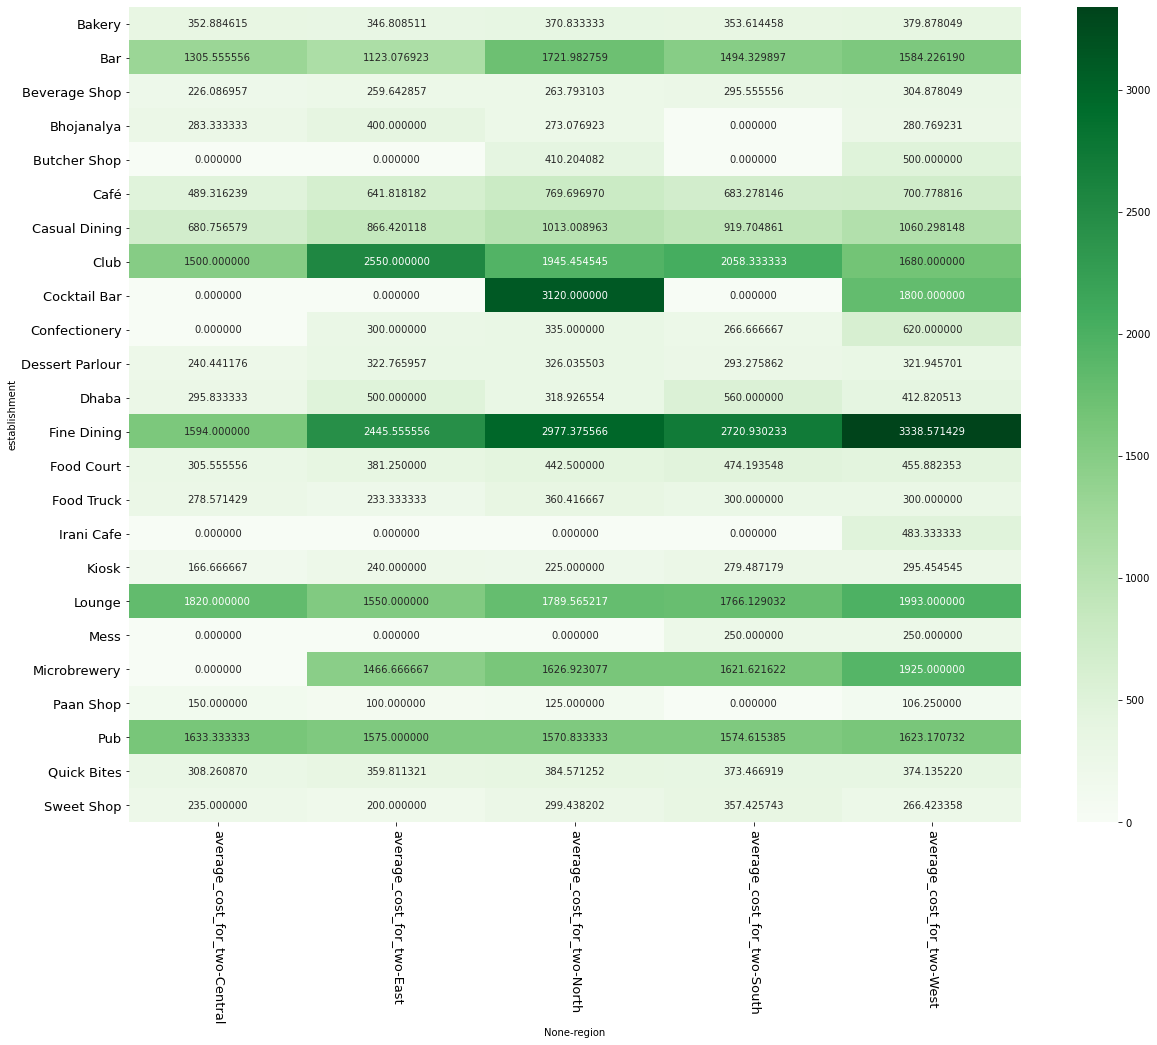

In [129]:
plt.figure(figsize=[20,15])
g=sns.heatmap(h,annot=True,fmt='f',cmap='Greens')
plt.xticks(size=13)
plt.yticks(size=13)
g.set_xticklabels(g.get_xticklabels(),rotation=-90)
plt.show()

In [130]:
i=df.pivot_table(index='establishment',columns='region',values=['photo_count'],aggfunc='mean')
i.replace({np.nan:0},inplace=True)
i

photo_count                                         \
region              Central         East        North        South   
establishment                                                        
Bakery            71.000000   396.617021   206.385417   172.421687   
Bar               97.000000   887.846154  1313.525862   528.587629   
Beverage Shop     23.913043   119.607143   113.689655    72.966667   
Bhojanalya         4.000000     9.000000    14.230769     0.000000   
Butcher Shop       0.000000     0.000000    22.551020     0.000000   
Café             160.529915  1004.563636   649.945455   719.218543   
Casual Dining     71.194079   793.239645   635.412292   497.602431   
Club              12.000000    68.500000   113.000000   141.083333   
Cocktail Bar       0.000000     0.000000  1172.200000     0.000000   
Confectionery      0.000000   102.500000    15.500000     2.611111   
Dessert Parlour   45.661765   242.042553   144.047337   185.879310   
Dhaba              6.000000   254.523810    18.768362   109.000000   
Fine Dining      206.680000   709.866667   501.171946   440.544186   
Food Court        17.222222    85.562500   100.966667    94.258065   
Food Truck        15.714286    10.166667    27.666667    20.812500   
Irani Cafe         0.000000     0.000000     0.000000     0.000000   
Kiosk             20.000000    27.400000    16.558824    39.589744   
Lounge            22.000000   304.346154  1339.252174   255.397849   
Mess               0.000000     0.000000     0.000000    29.416667   
Microbrewery       0.000000  2071.666667  1967.769231  2670.216216   
Paan Shop          2.000000    36.000000    11.500000     0.000000   
Pub              102.333333  1625.833333   964.666667   623.323077   
Quick Bites       45.315942   191.443396   136.026022   123.090737   
Sweet Shop        23.150000   197.766667   159.224719   118.782178   

                              
region                  West  
establishment                 
Bakery            324.347561  
Bar              1462.589286  
Beverage Shop     107.146341  
Bhojanalya          7.153846  
Butcher Shop       37.000000  
Café              920.601246  
Casual Dining     917.147222  
Club               94.200000  
Cocktail Bar       45.000000  
Confectionery      24.300000  
Dessert Parlour   315.018100  
Dhaba              35.102564  
Fine Dining       954.611429  
Food Court         97.098039  
Food Truck         44.326923  
Irani Cafe        120.666667  
Kiosk              25.363636  
Lounge            665.030000  
Mess               10.750000  
Microbrewery      879.833333  
Paan Shop          20.625000  
Pub               827.243902  
Quick Bites       285.724843  
Sweet Shop         64.379562

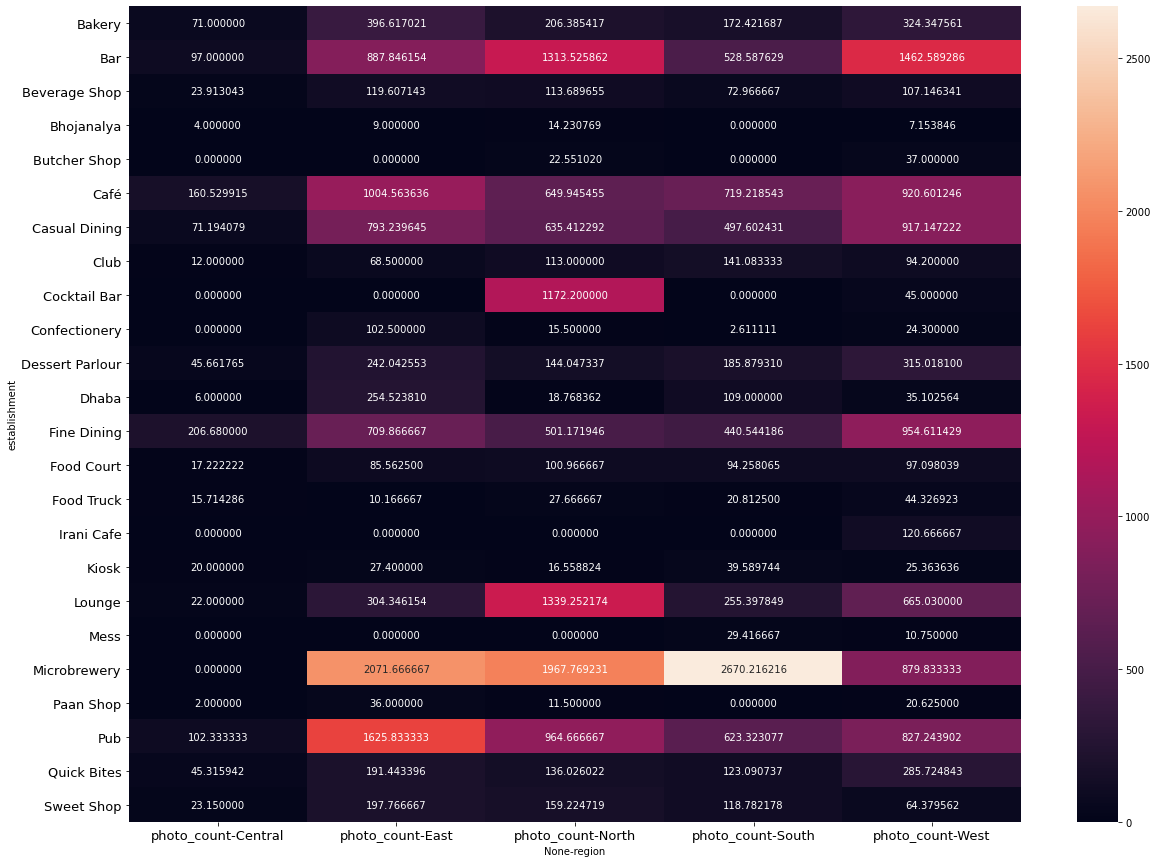

In [131]:
plt.figure(figsize=[20,15])
sns.heatmap(i,annot=True,fmt='f')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [132]:
j=df.pivot_table(index='establishment',columns='region',values=['votes'],aggfunc='sum')
j.replace({np.nan:0},inplace=True)
j

votes                                          
region           Central      East     North      South       West
establishment                                                     
Bakery            5791.0   18240.0   49258.0    32673.0    60203.0
Bar               1341.0   17773.0   99074.0    80562.0   296435.0
Beverage Shop     1926.0    5445.0   10470.0    13258.0    12832.0
Bhojanalya         277.0      88.0    2168.0        0.0      312.0
Butcher Shop         0.0       0.0    3571.0        0.0       56.0
Café             25024.0   70036.0  170918.0   204079.0   238190.0
Casual Dining    66923.0  255748.0  596502.0  1119629.0  1077308.0
Club               101.0    2071.0    1663.0     8396.0     2281.0
Cocktail Bar         0.0       0.0    4741.0        0.0       52.0
Confectionery        0.0     136.0     488.0       51.0      207.0
Dessert Parlour   4868.0   11532.0   35298.0    79872.0    75931.0
Dhaba              702.0   14484.0   37267.0      986.0     4050.0
Fine Dining       9257.0   25298.0   97561.0    82470.0   137377.0
Food Court         520.0    2192.0    9236.0    12936.0     7713.0
Food Truck         415.0     499.0    1208.0      667.0     3948.0
Irani Cafe           0.0       0.0       0.0        0.0      357.0
Kiosk              227.0     168.0    1394.0     2978.0      905.0
Lounge             262.0    9717.0  116524.0    48046.0    62399.0
Mess                 0.0       0.0       0.0     2426.0       52.0
Microbrewery         0.0    4828.0   12780.0   151917.0     5635.0
Paan Shop           12.0      93.0     134.0        0.0      423.0
Pub                943.0   15003.0   32812.0    80349.0    47652.0
Quick Bites      75974.0   89518.0  386519.0   257943.0   340016.0
Sweet Shop        7564.0    9714.0   69748.0    18271.0    18294.0

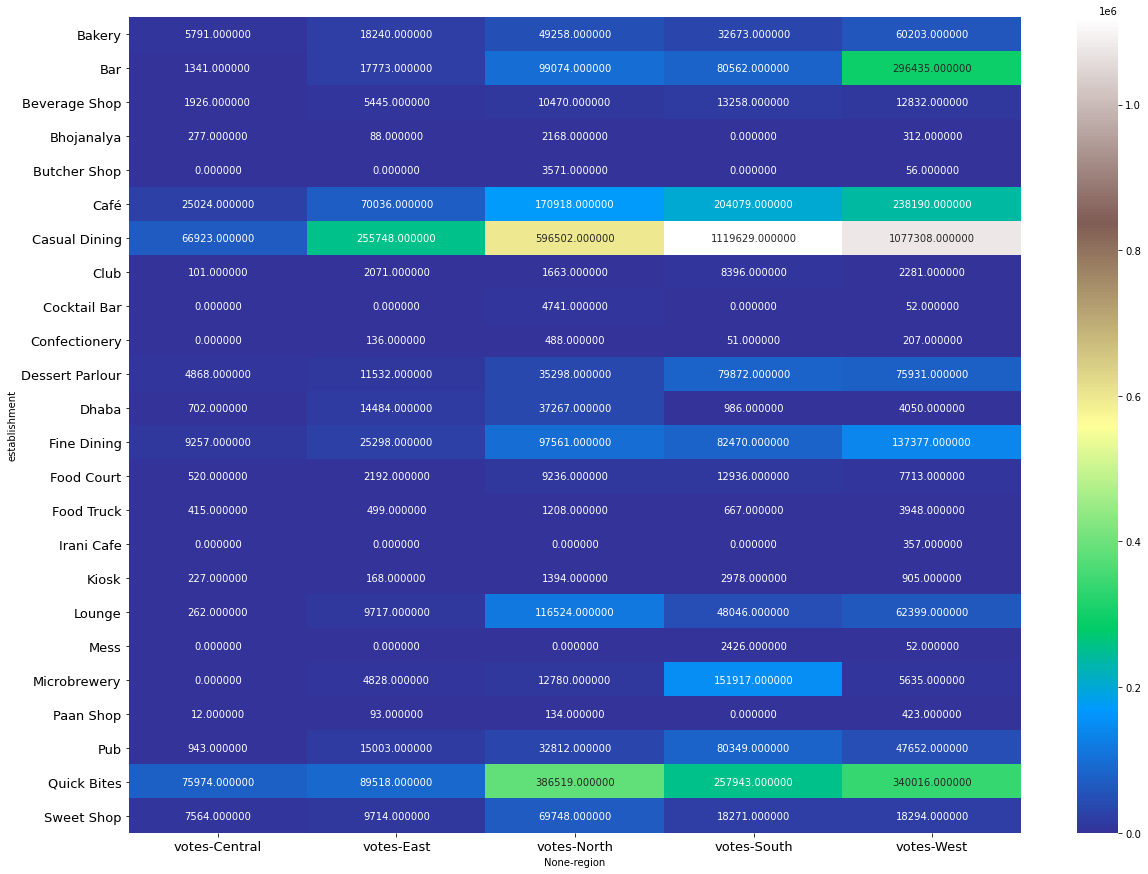

In [133]:
plt.figure(figsize=[20,15])
sns.heatmap(j,annot=True,fmt='f',cmap='terrain')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [134]:
k=df.pivot_table(index='establishment',columns='region',values=['aggregate_rating'],aggfunc='mean')
k.replace({np.nan:0},inplace=True)
k

aggregate_rating                                        
region                   Central      East     North     South      West
establishment                                                           
Bakery                  3.590385  3.655319  3.698958  3.731325  3.765854
Bar                     3.888889  3.934615  3.758621  3.754639  4.067262
Beverage Shop           3.147826  3.621429  3.765517  3.753333  3.578049
Bhojanalya              2.300000  3.500000  3.384615  0.000000  2.092308
Butcher Shop            0.000000  0.000000  3.522449  0.000000  3.400000
Café                    3.794872  3.951818  3.886970  3.914570  3.885981
Casual Dining           3.665461  3.941420  3.896159  3.903299  3.910833
Club                    3.700000  3.725000  3.563636  3.958333  3.660000
Cocktail Bar            0.000000  0.000000  4.320000  0.000000  3.800000
Confectionery           0.000000  4.100000  2.865000  0.405556  2.600000
Dessert Parlour         3.491176  3.893617  3.781065  3.878966  3.906335
Dhaba                   2.316667  3.076190  3.251412  3.540000  2.892308
Fine Dining             4.144000  4.057778  3.969231  4.068837  4.108571
Food Court              3.044444  3.575000  3.423333  3.450000  3.286275
Food Truck              3.614286  2.250000  3.470833  3.250000  3.240385
Irani Cafe              0.000000  0.000000  0.000000  0.000000  3.733333
Kiosk                   3.350000  3.260000  2.794118  3.405128  3.236364
Lounge                  3.680000  3.761538  3.896522  3.751613  3.867000
Mess                    0.000000  0.000000  0.000000  3.391667  1.525000
Microbrewery            0.000000  4.200000  4.430769  4.500000  4.316667
Paan Shop               3.200000  3.800000  3.525000  0.000000  2.962500
Pub                     3.666667  4.133333  3.820833  3.960000  3.878049
Quick Bites             3.536232  3.717925  3.691450  3.693384  3.719654
Sweet Shop              3.050000  3.820000  3.614045  3.665347  3.636496

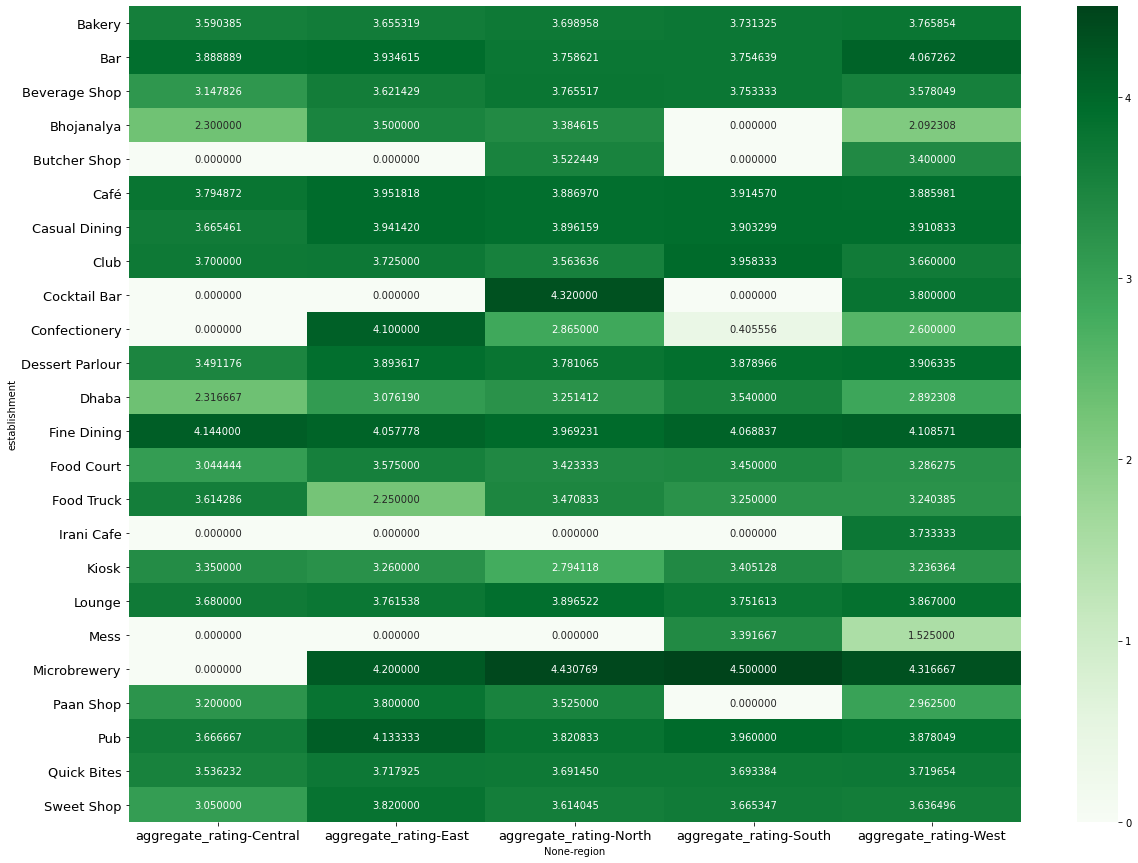

In [135]:
plt.figure(figsize=[20,15])
sns.heatmap(k,annot=True,fmt='f',cmap='Greens')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [136]:
k=df.pivot_table(index='region',values=['aggregate_rating'],aggfunc='mean')
k.replace({np.nan:0},inplace=True)
k.reset_index(inplace=True)
k

,region,aggregate_rating
0,Central,3.567988
1,East,3.829388
2,North,3.744222
3,South,3.818080
4,West,3.809281


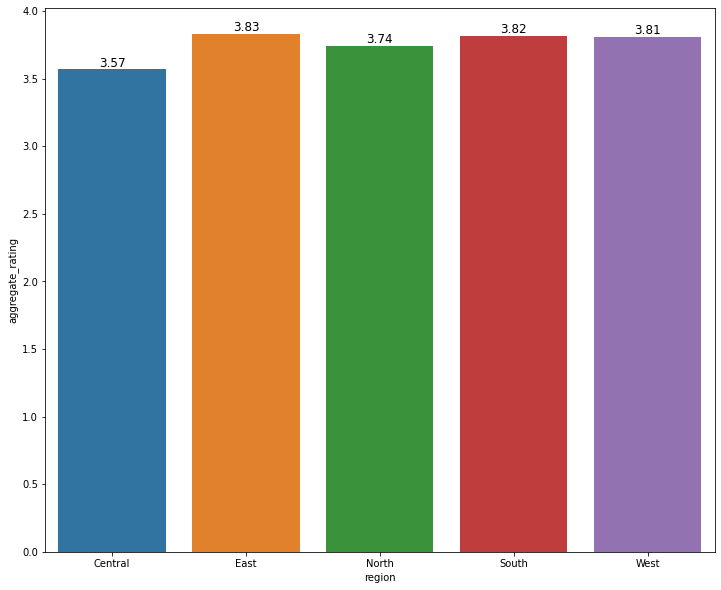

In [140]:
plt.figure(figsize=[12,10])
g=sns.barplot(x='region',y='aggregate_rating',data=k)
for i in g.patches:
    g.annotate('{:.2f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
plt.show()

In [138]:
l=df.pivot_table(index='establishment',values=['aggregate_rating'],aggfunc='mean')
l.replace({np.nan:0},inplace=True)
l.reset_index(inplace=True)
l

,establishment,aggregate_rating
0,Bakery,3.712882
1,Bar,3.896154
2,Beverage Shop,3.641993
3,Bhojanalya,2.681818
4,Butcher Shop,3.520000
5,Café,3.890678
6,Casual Dining,3.887743
7,Club,3.745455
8,Cocktail Bar,4.233333
9,Confectionery,1.976000


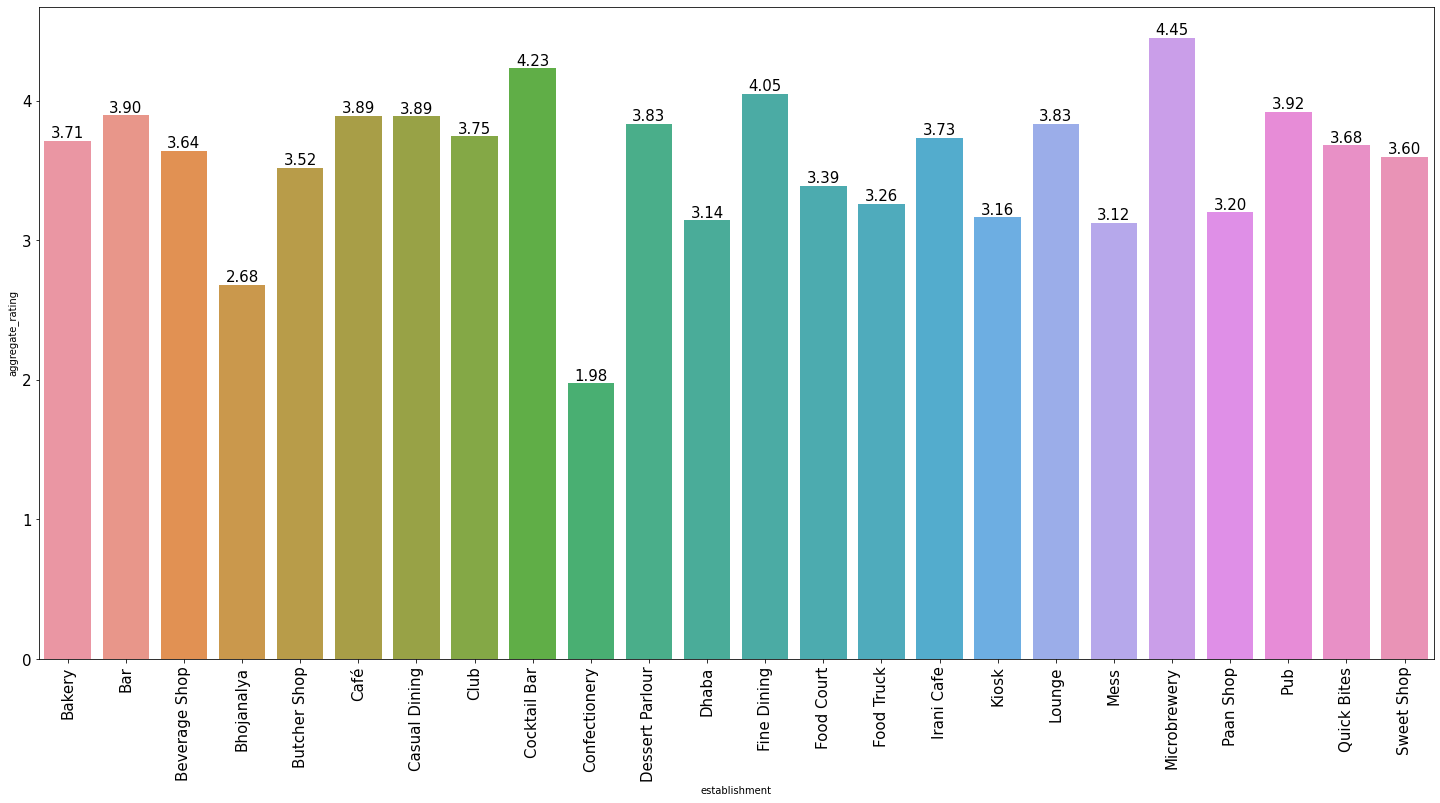

In [139]:
plt.figure(figsize=[25,12])
g=sns.barplot(x='establishment',y='aggregate_rating',data=l)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.xticks(size=15)
plt.yticks(size=15)
for i in g.patches:
    g.annotate('{:.2f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.show()